In [1]:
#https://github.com/andrewgreenconvoy/betting-analysis-regarding-baseball
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import statsmodels.formula.api as smf

#https://github.com/jldbc/pybaseball/blob/master/docs/team_batting.md
from pybaseball import statcast
from pybaseball import standings
from pybaseball import schedule_and_record
import pybaseball

In [2]:
# Below link has definititons of MLB Advanced Metrics
# https://docs.google.com/document/d/1lwhnN7Mspalc8uRED6fmNGJCurcKP85mWomOG8eRaq0/edit

In [3]:
#pulling 10 years of team data
year = 2008
hitting = pybaseball.team_batting(2007)
while year < 2020:
    hitting_year = pybaseball.team_batting(year)
    hitting = pd.concat([hitting,hitting_year])
    year = year +1 

#bringing runs to season data on n-1 lag
hitting['runs_year'] = hitting['Season'] - 1
hitting = hitting.merge(hitting[['Season','R','teamIDfg']]
                        , left_on=['teamIDfg','runs_year']
                        , right_on=['teamIDfg','Season']
                       ,suffixes=['_current','_next'])

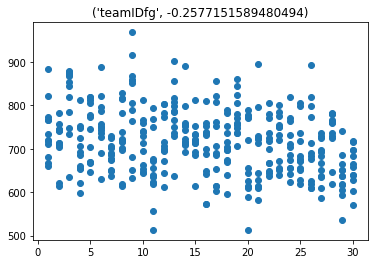

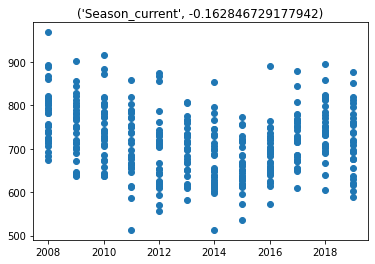

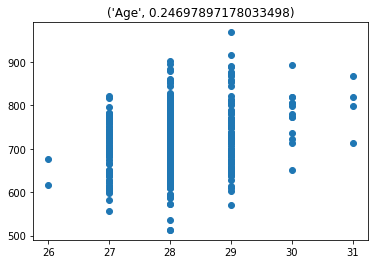

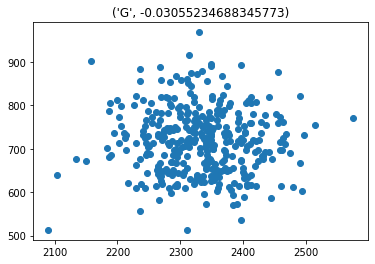

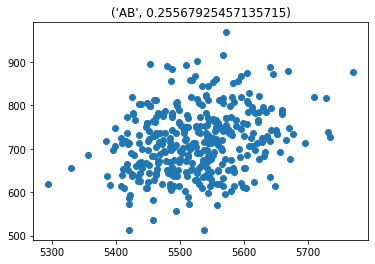

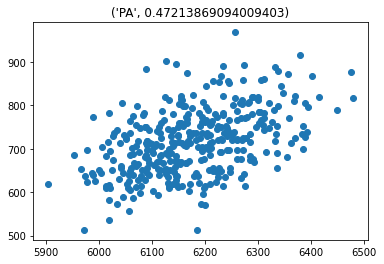

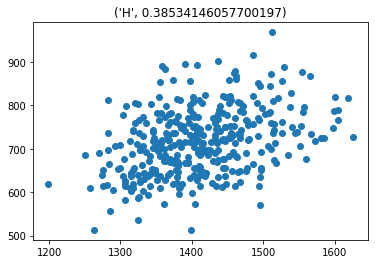

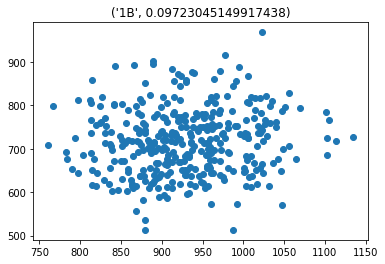

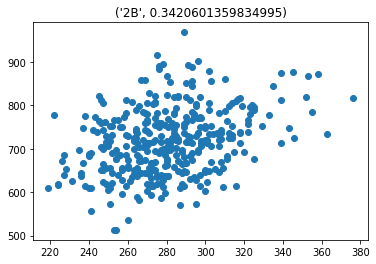

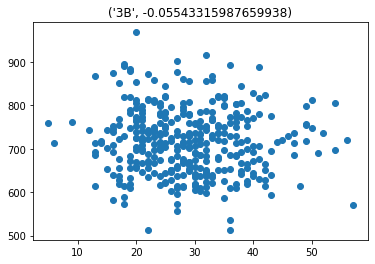

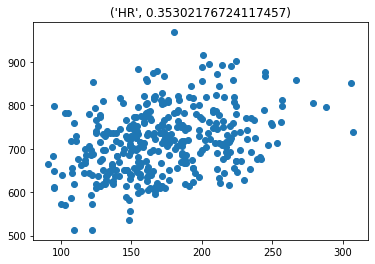

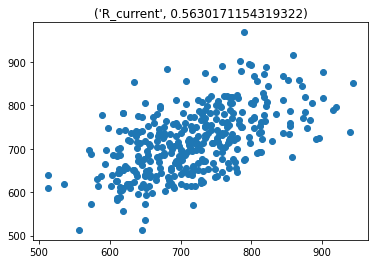

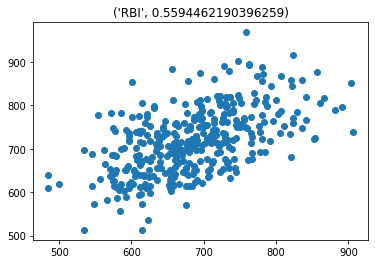

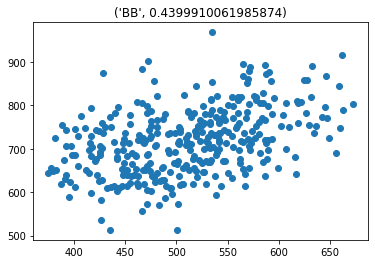

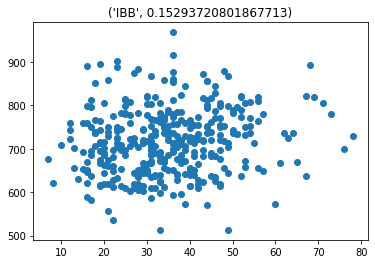

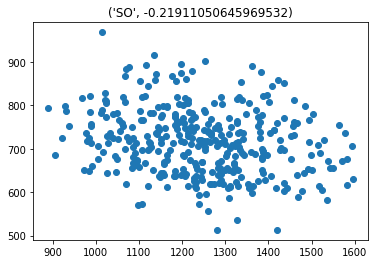

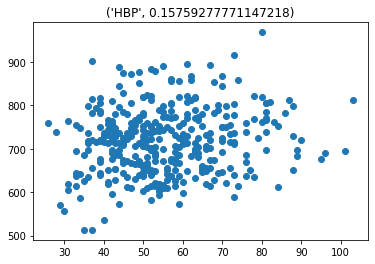

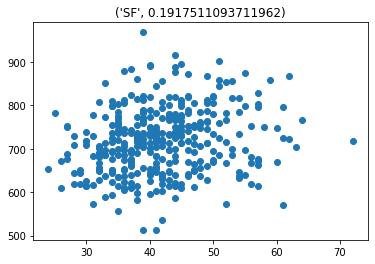

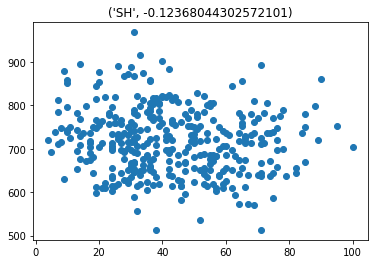

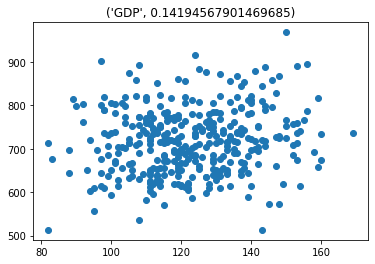

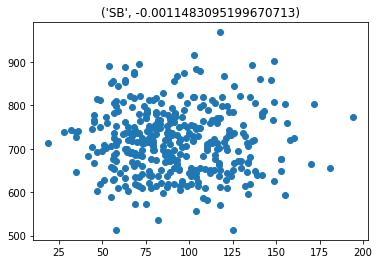

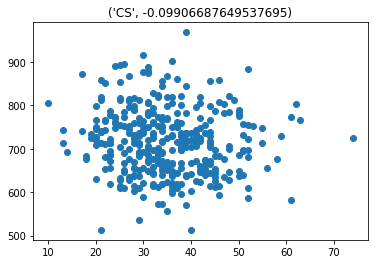

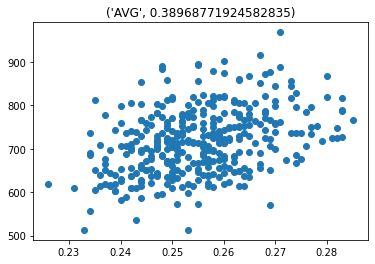

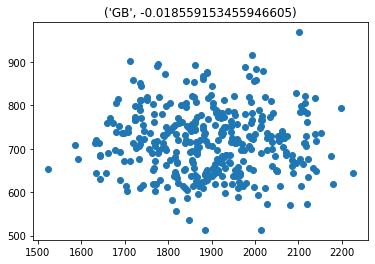

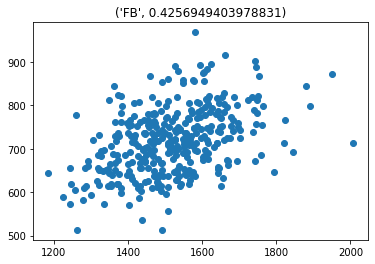

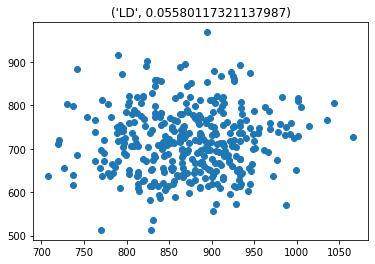

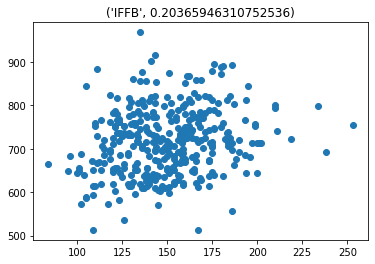

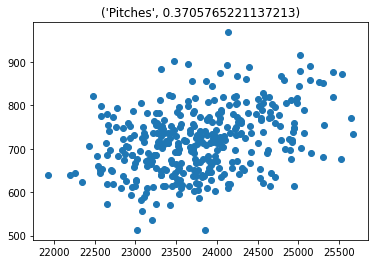

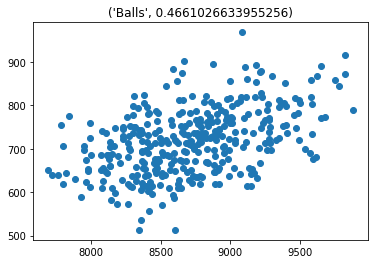

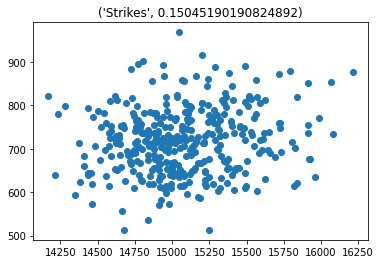

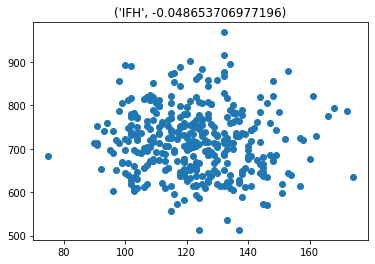

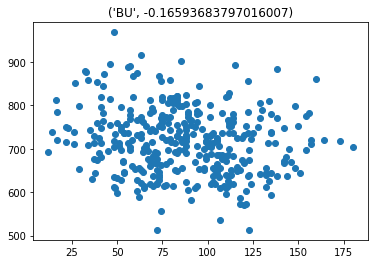

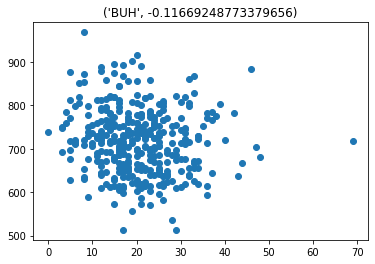

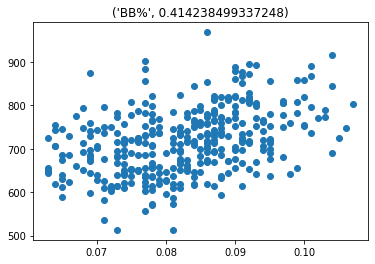

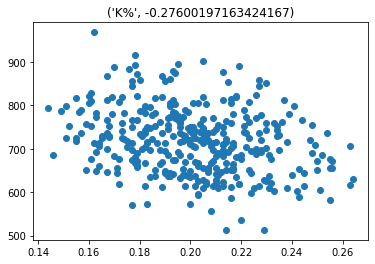

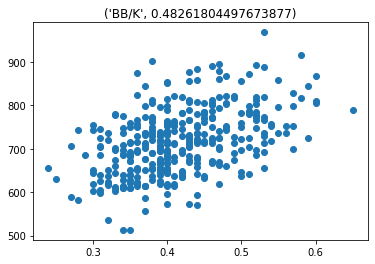

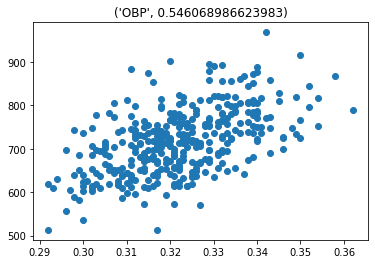

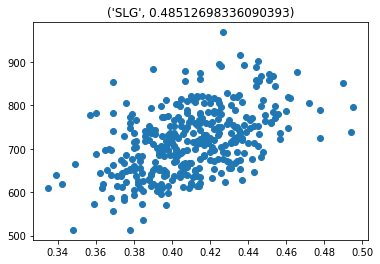

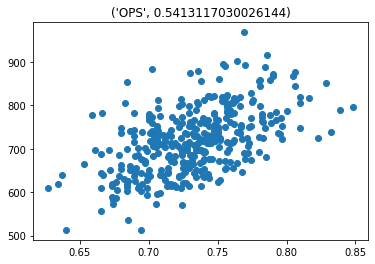

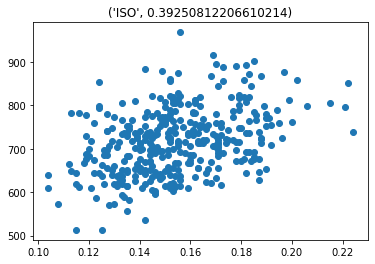

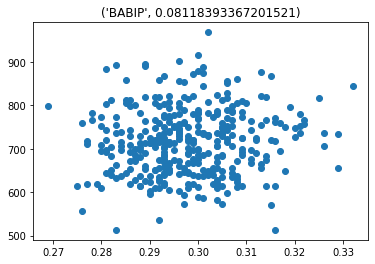

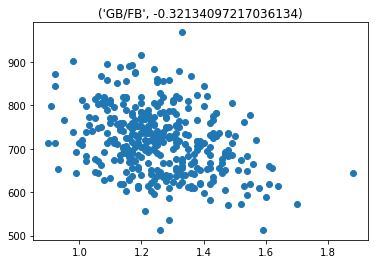

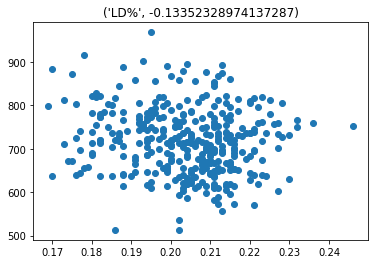

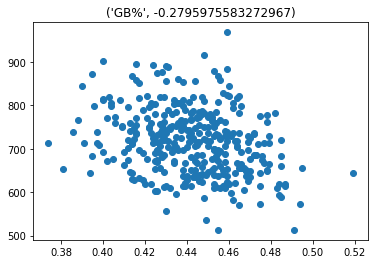

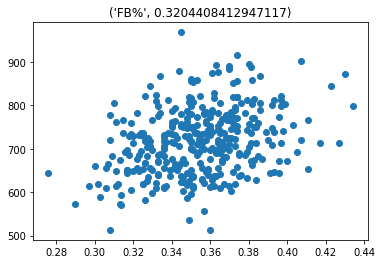

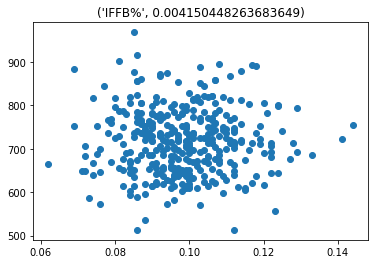

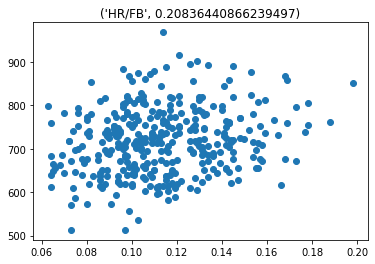

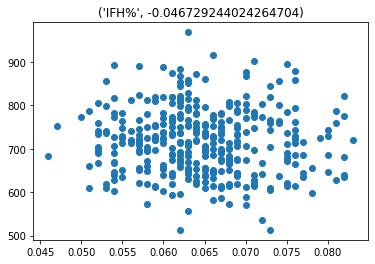

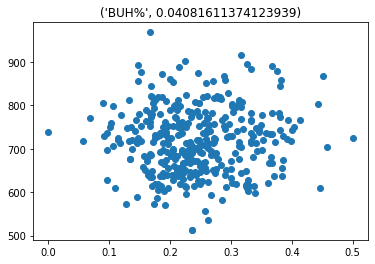

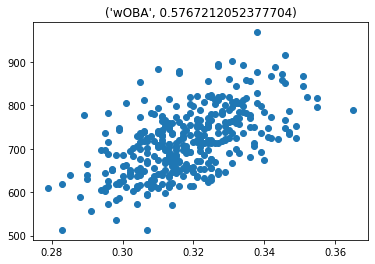

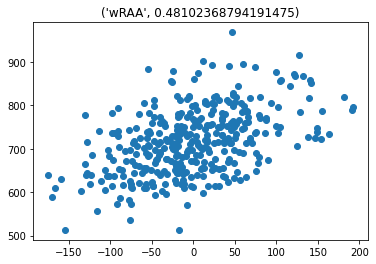

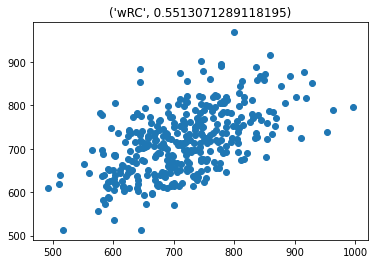

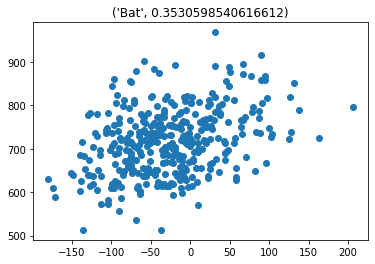

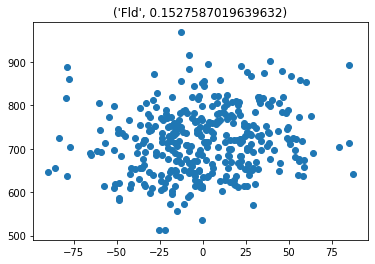

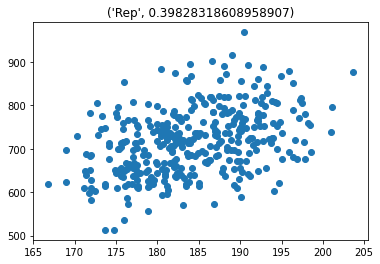

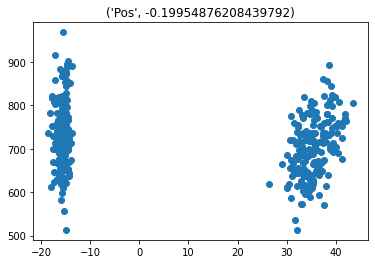

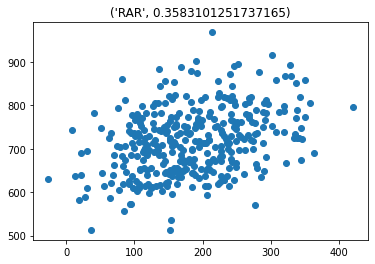

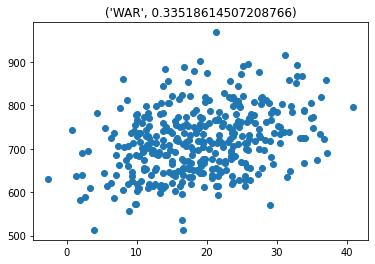

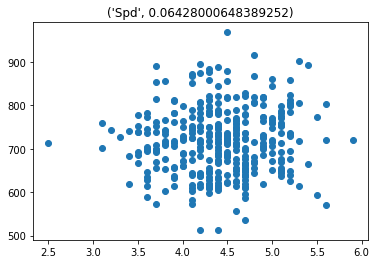

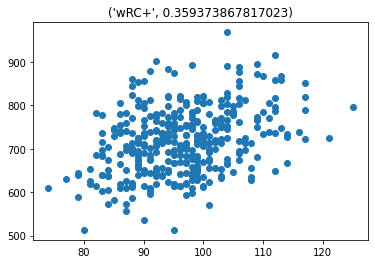

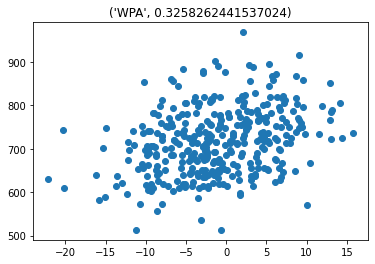

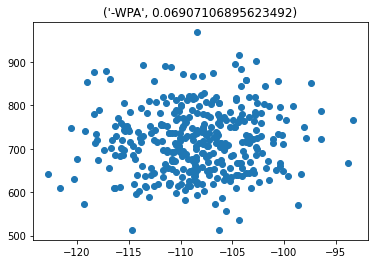

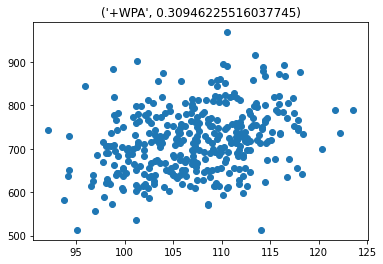

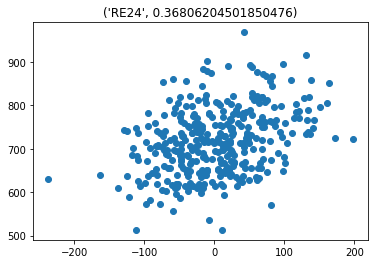

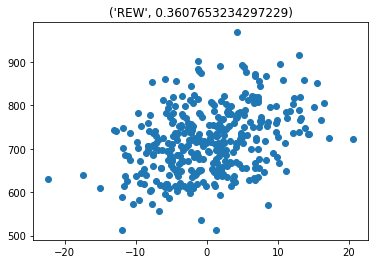

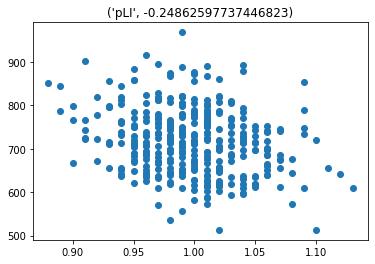

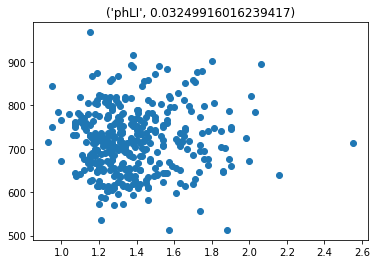

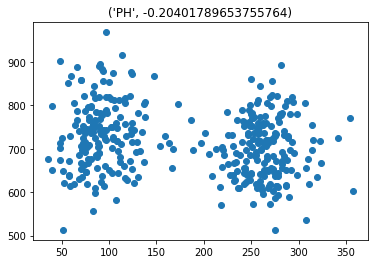

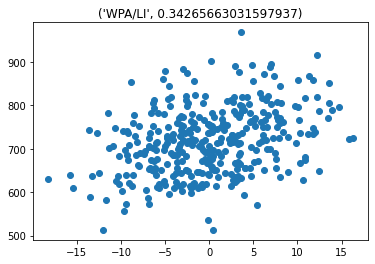

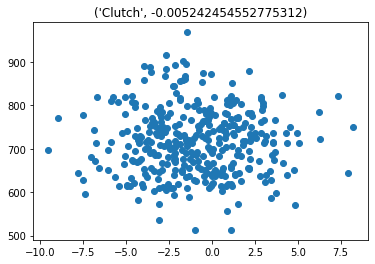

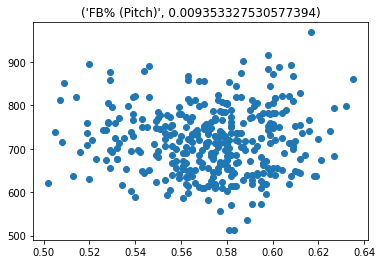

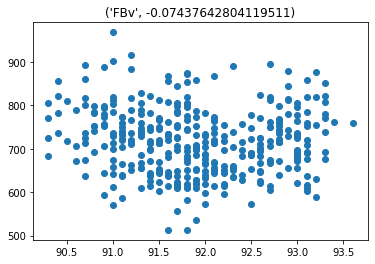

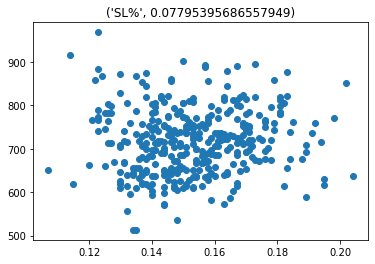

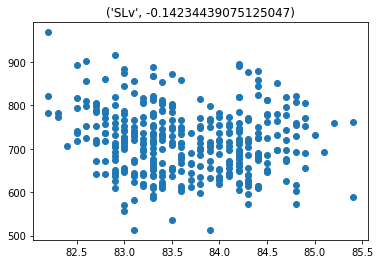

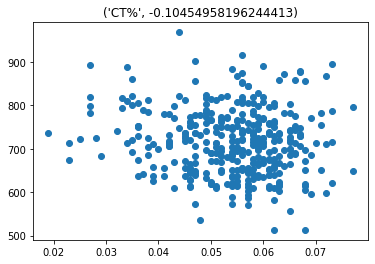

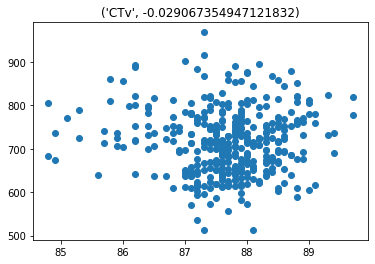

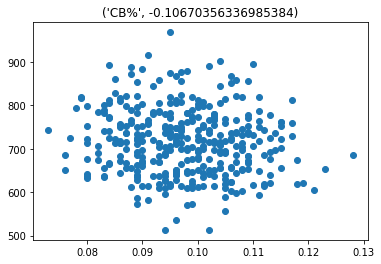

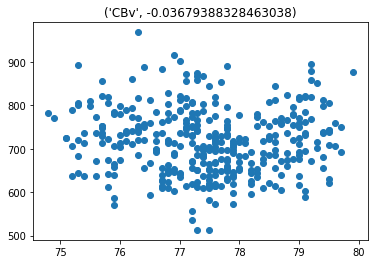

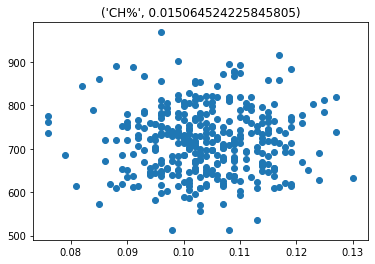

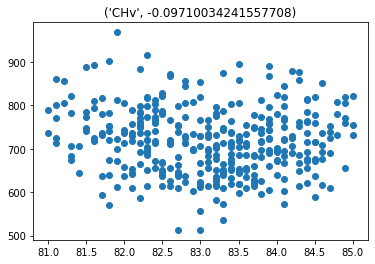

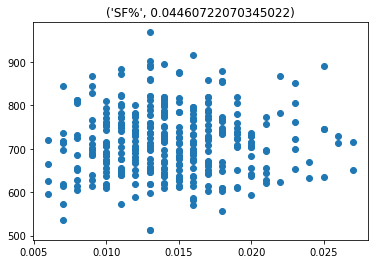

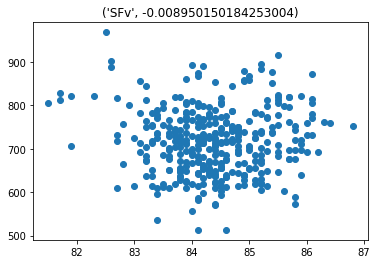

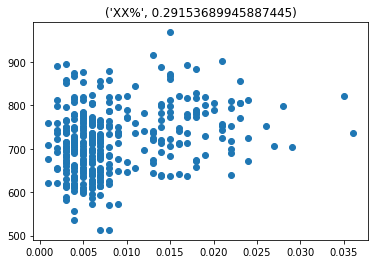

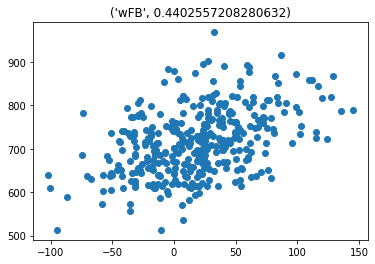

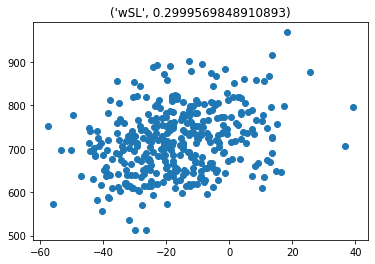

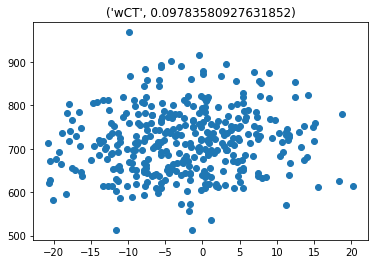

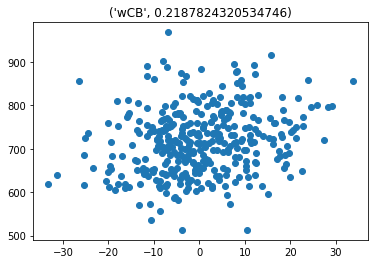

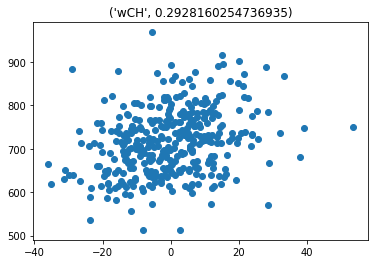

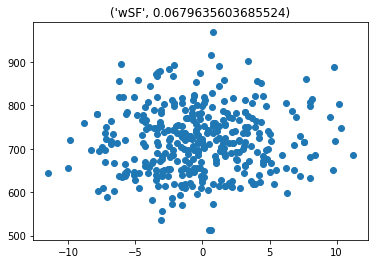

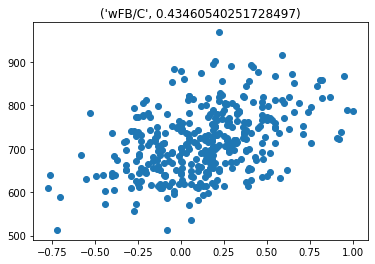

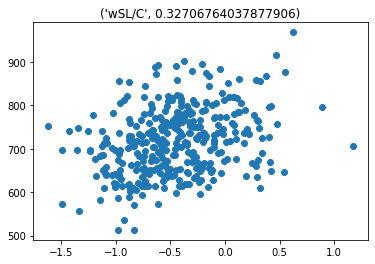

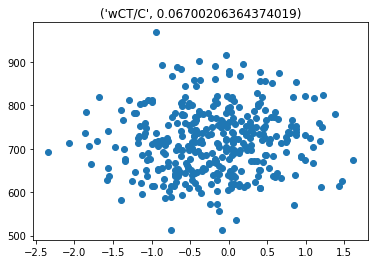

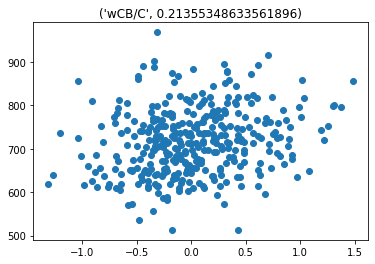

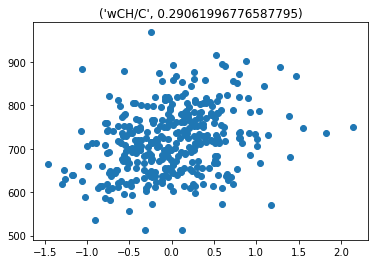

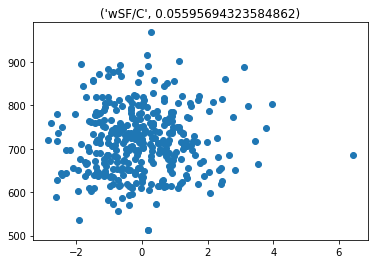

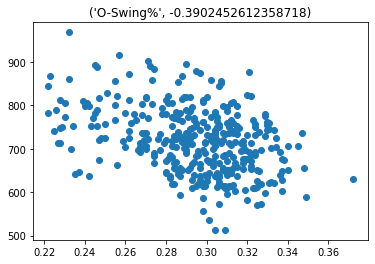

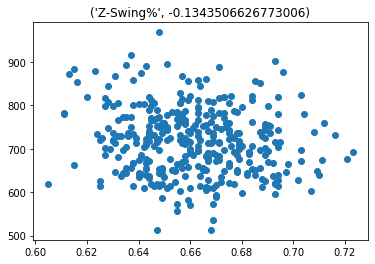

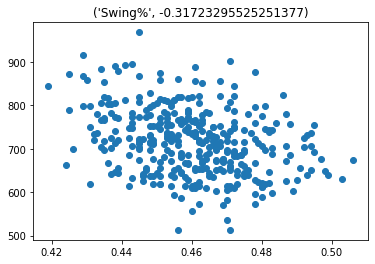

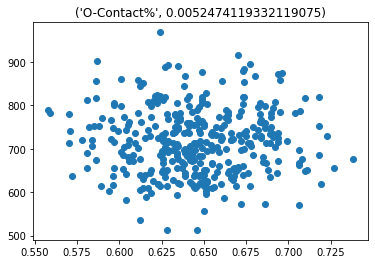

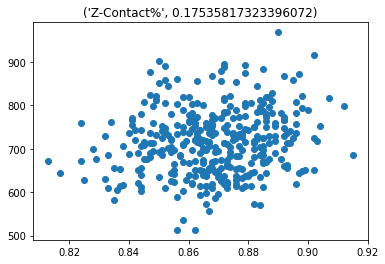

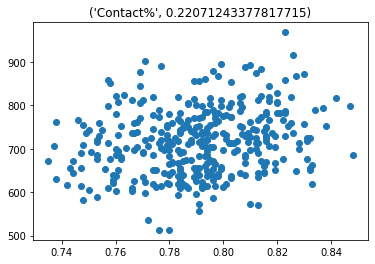

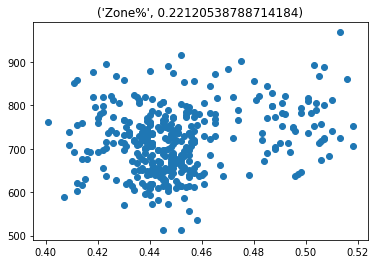

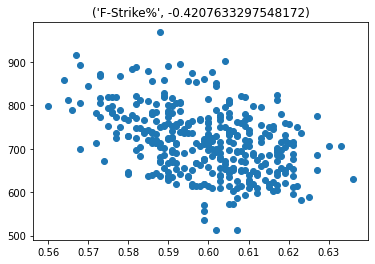

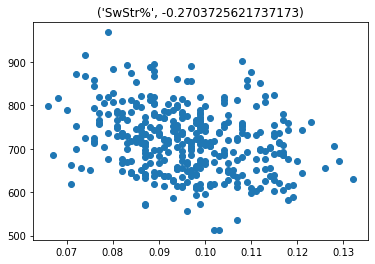

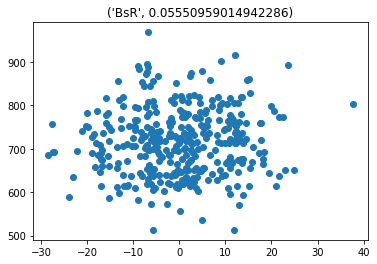

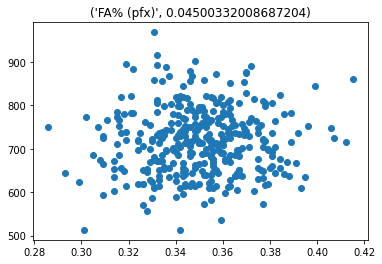

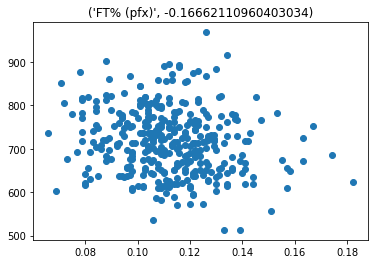

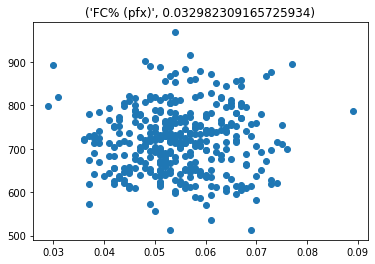

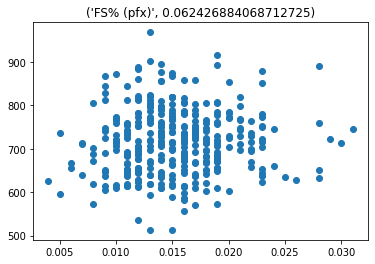

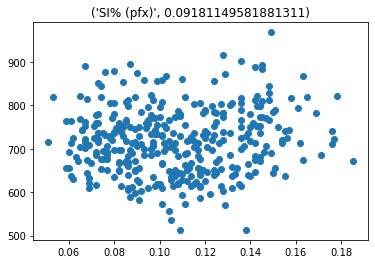

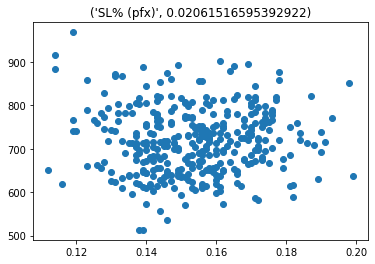

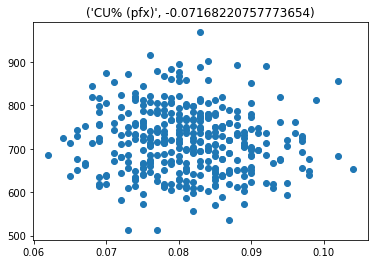

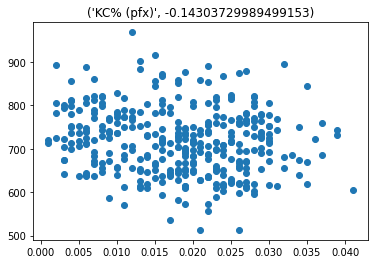

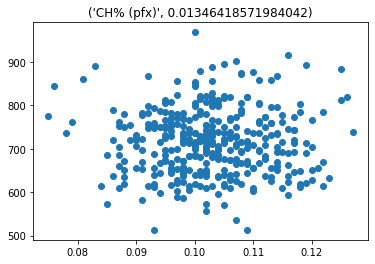

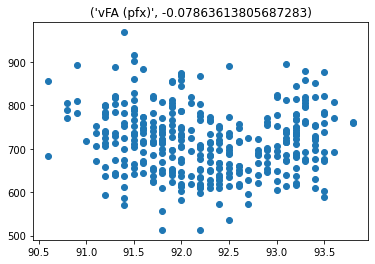

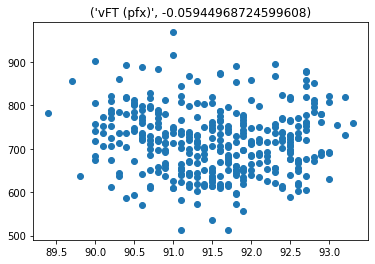

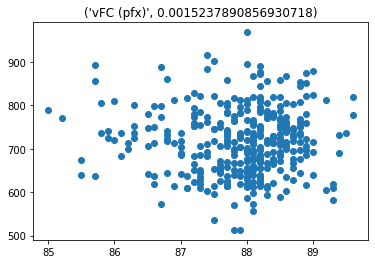

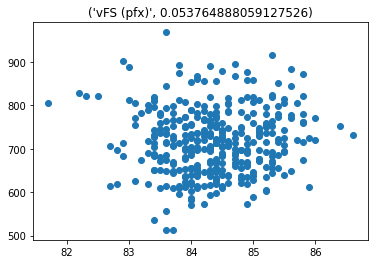

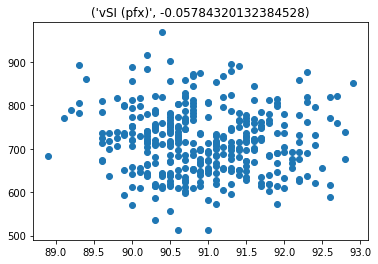

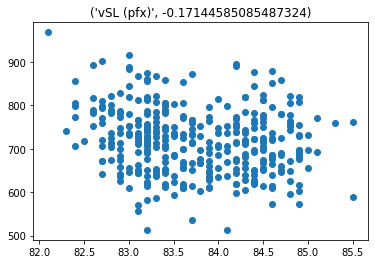

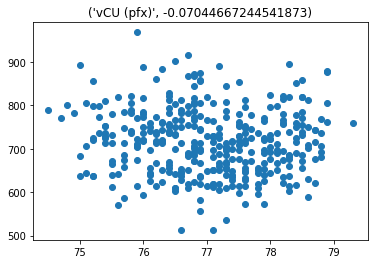

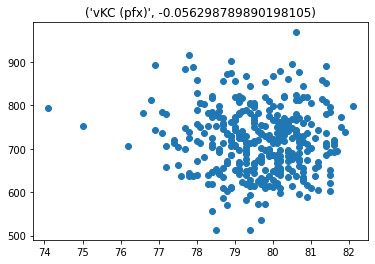

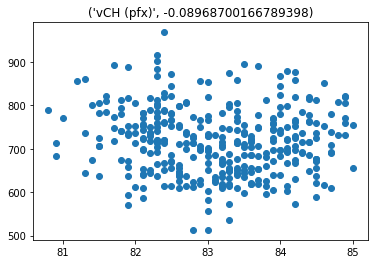

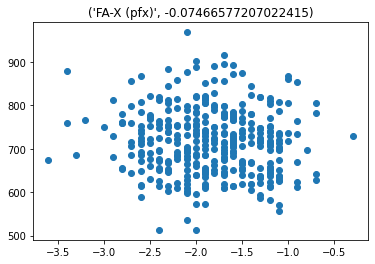

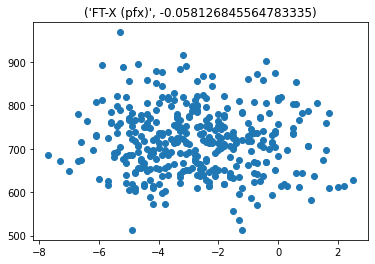

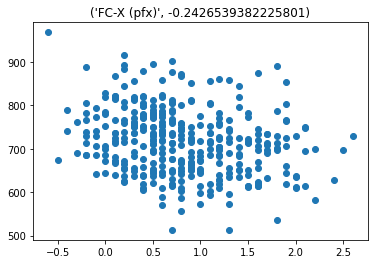

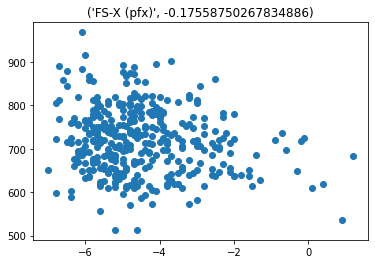

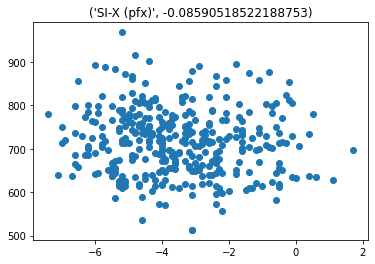

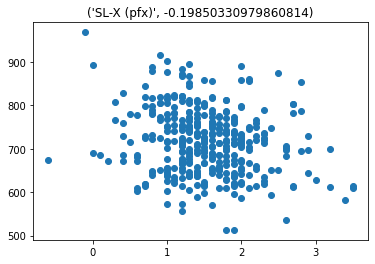

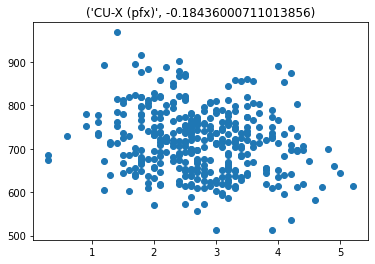

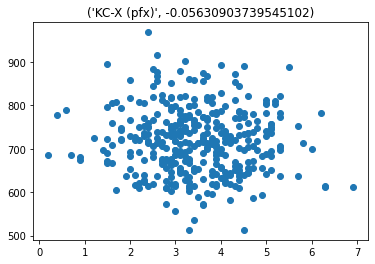

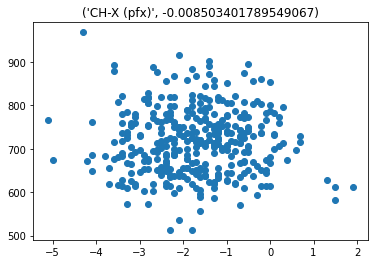

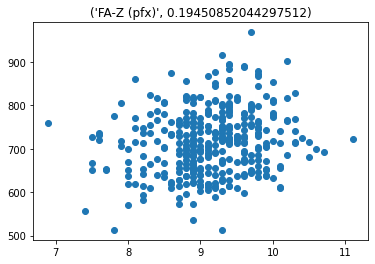

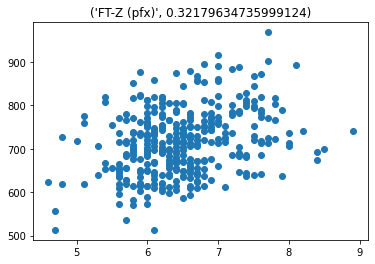

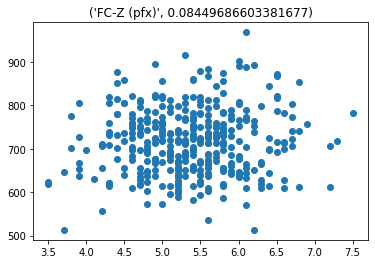

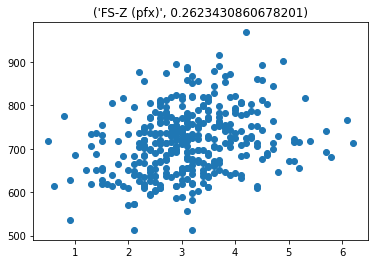

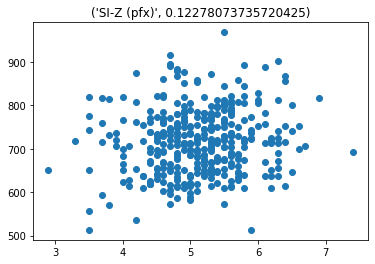

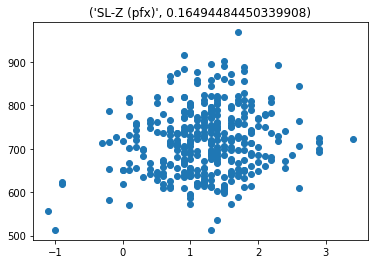

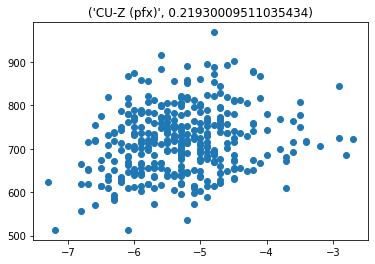

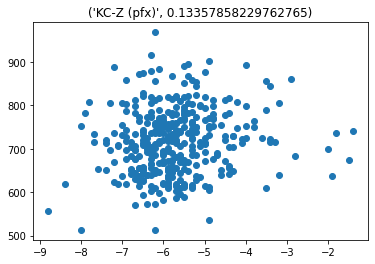

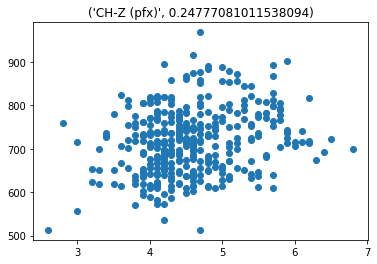

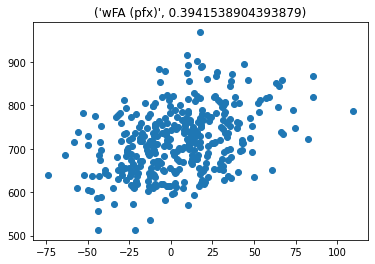

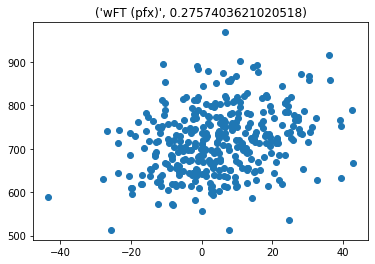

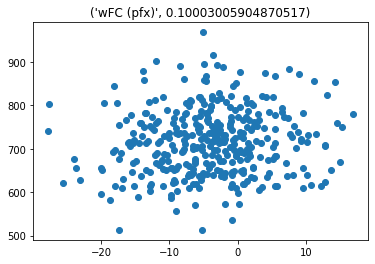

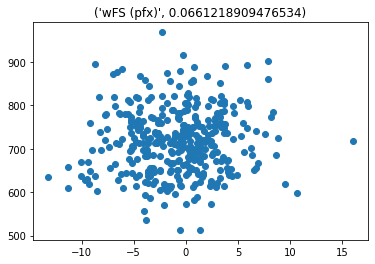

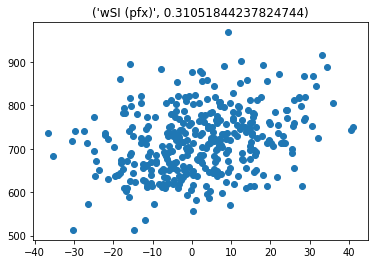

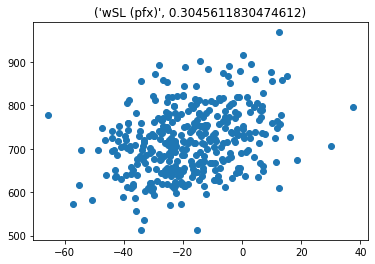

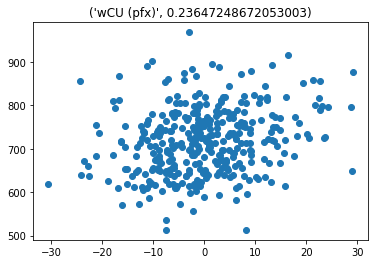

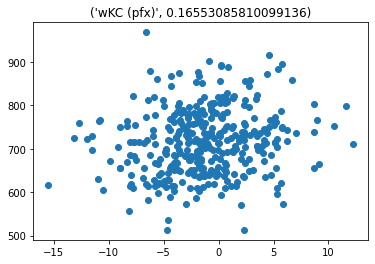

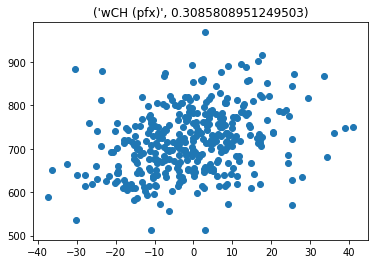

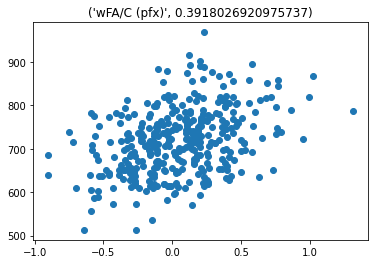

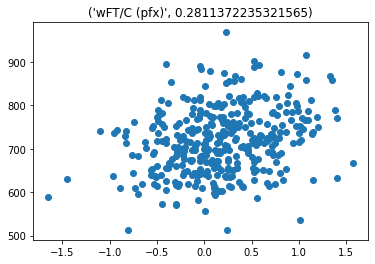

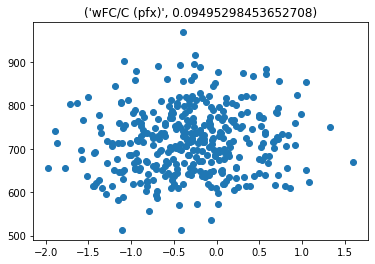

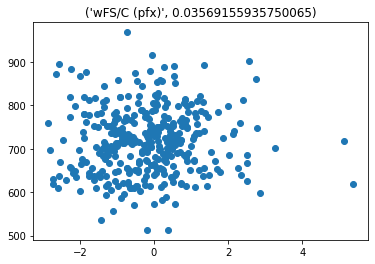

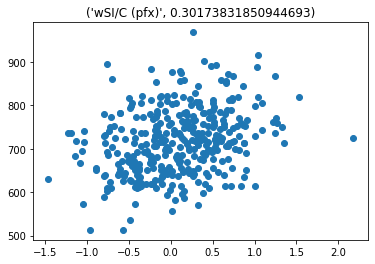

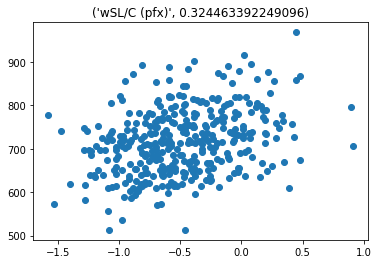

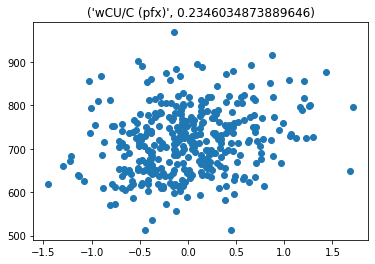

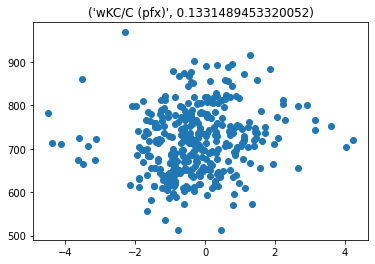

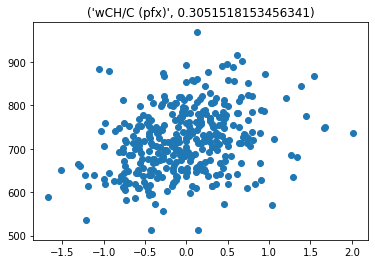

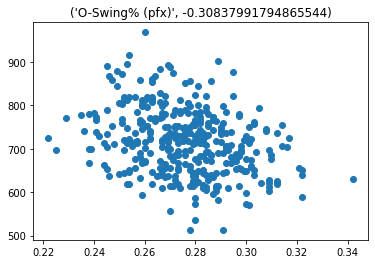

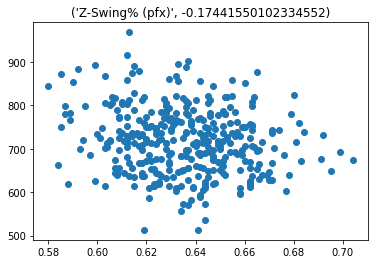

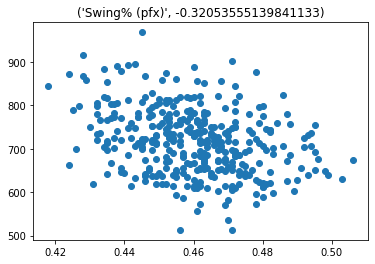

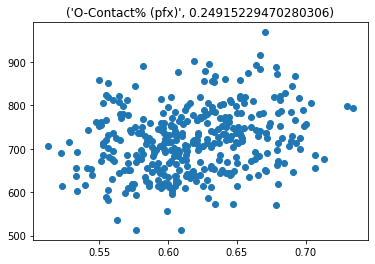

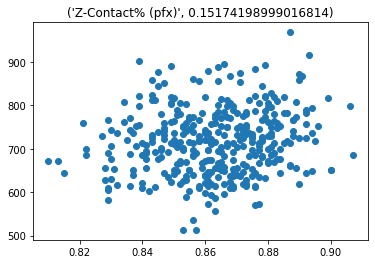

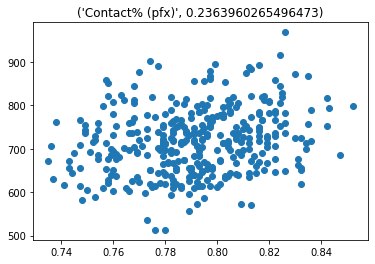

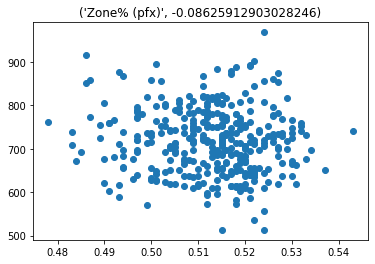

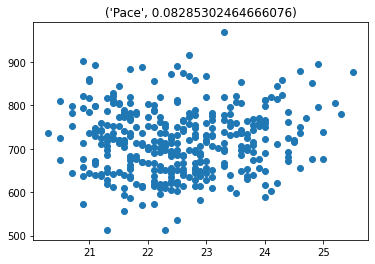

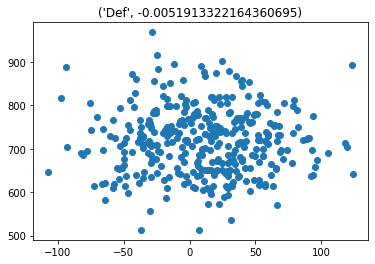

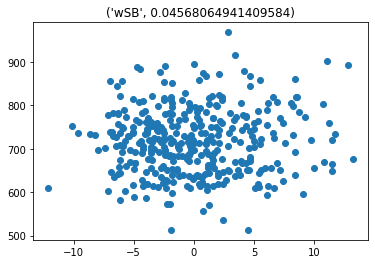

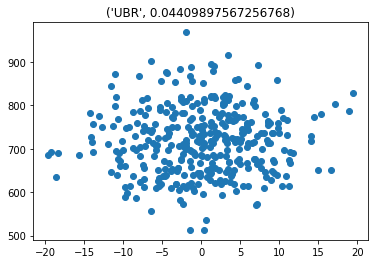

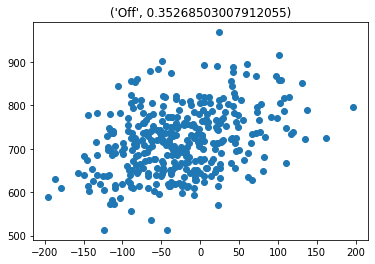

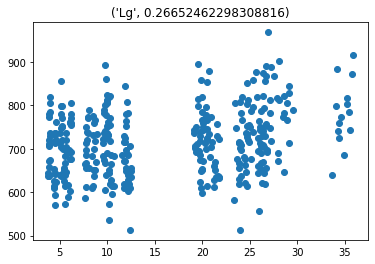

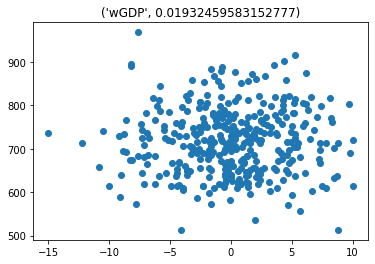

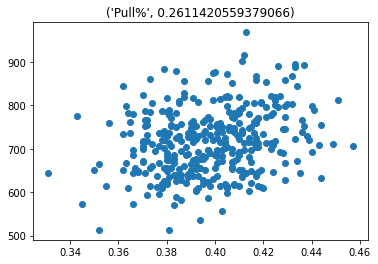

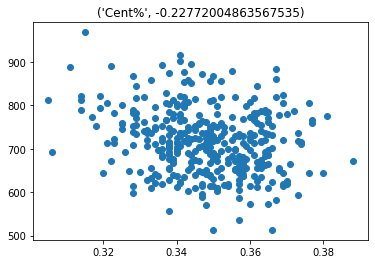

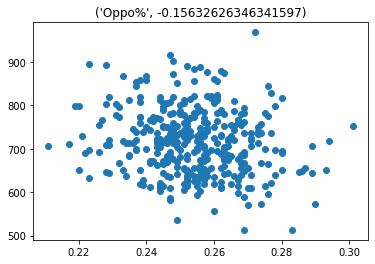

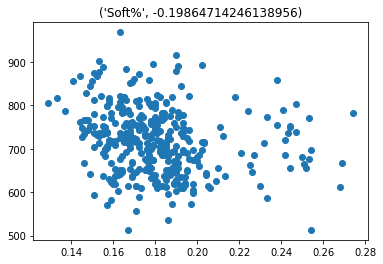

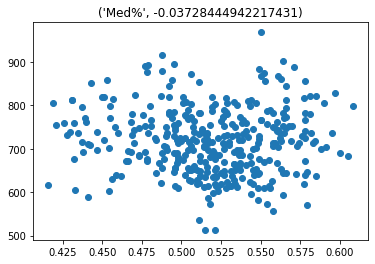

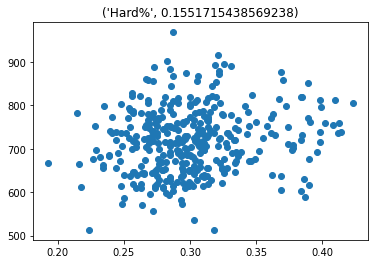

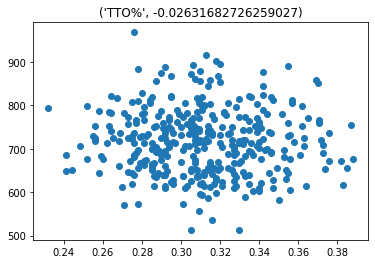

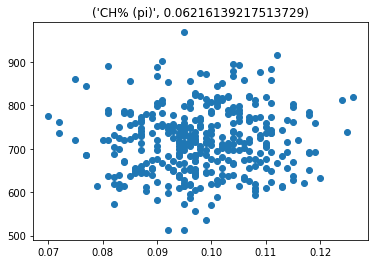

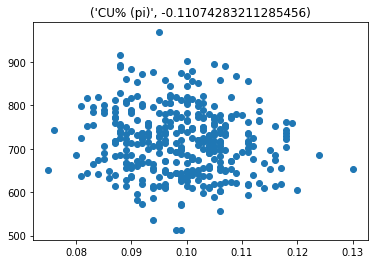

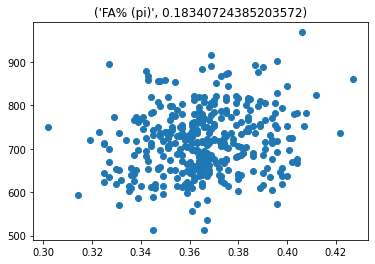

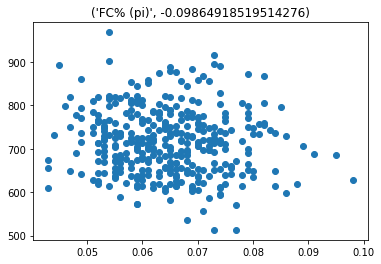

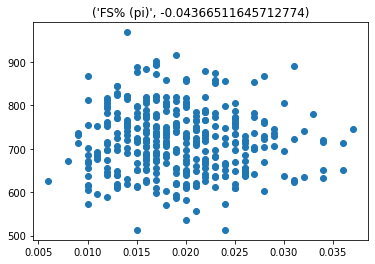

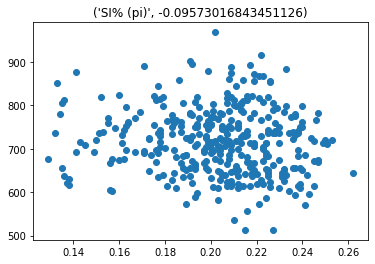

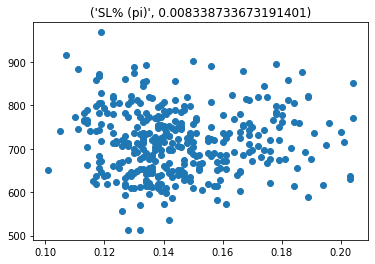

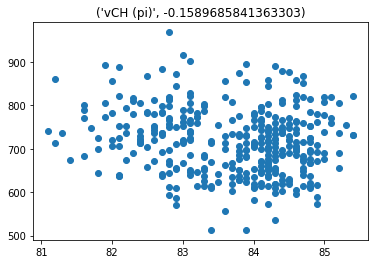

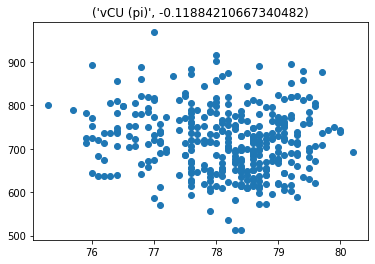

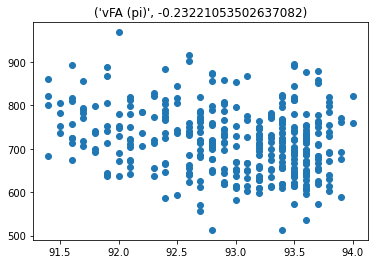

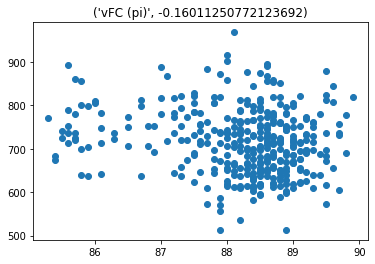

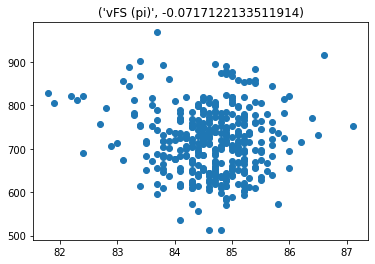

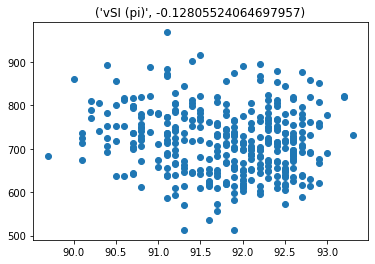

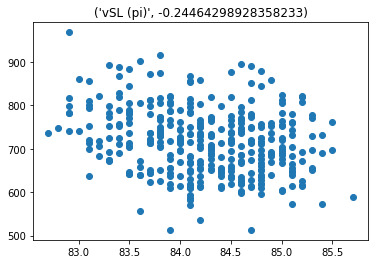

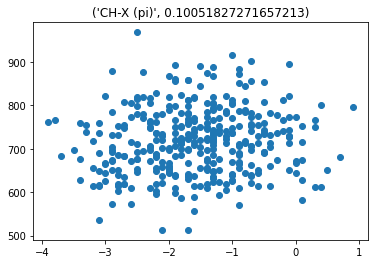

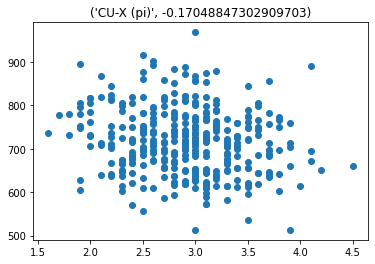

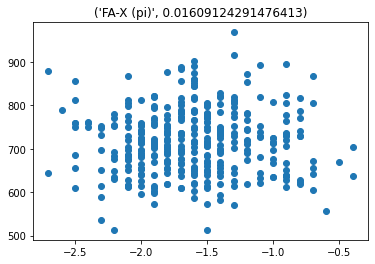

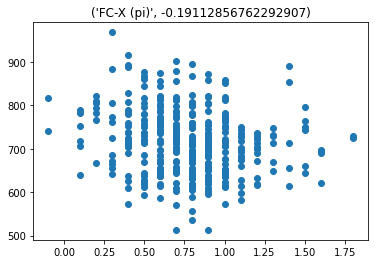

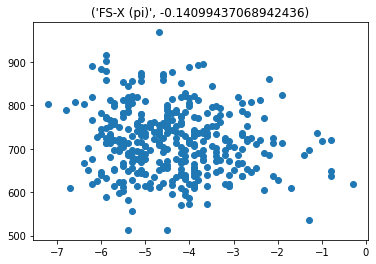

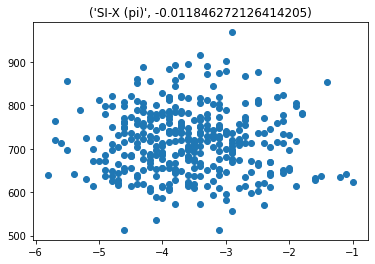

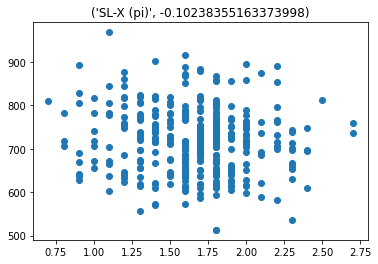

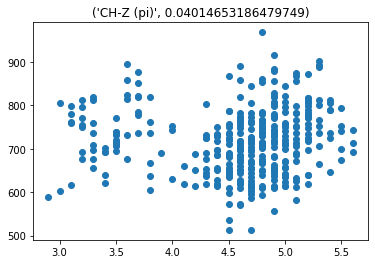

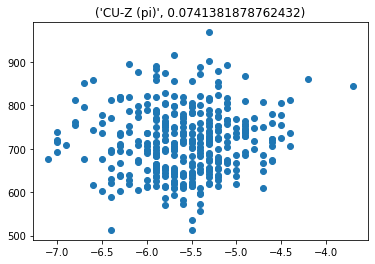

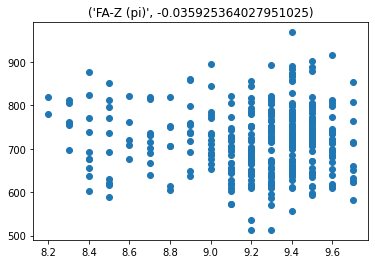

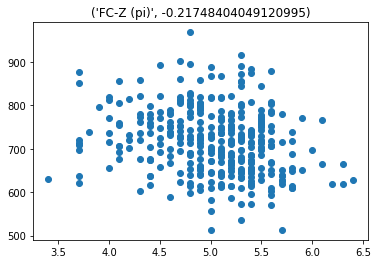

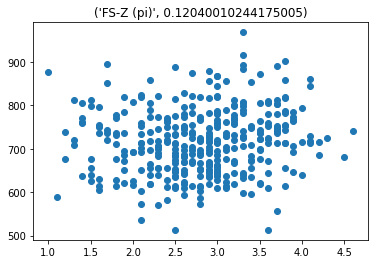

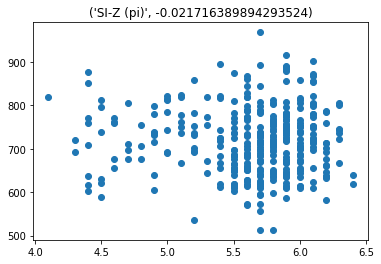

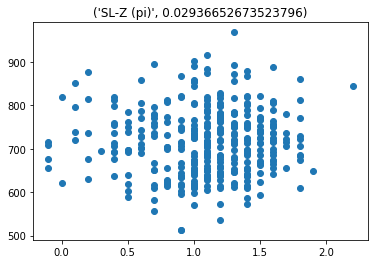

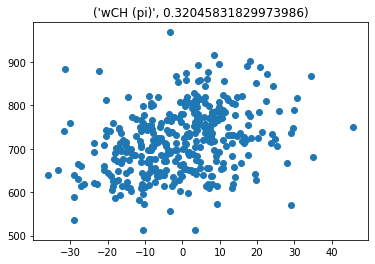

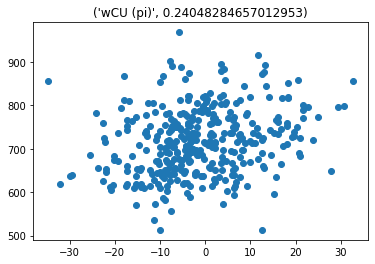

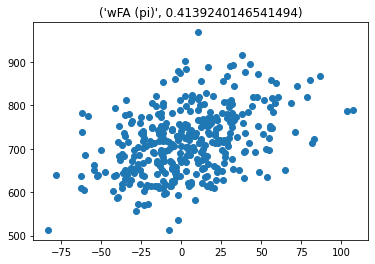

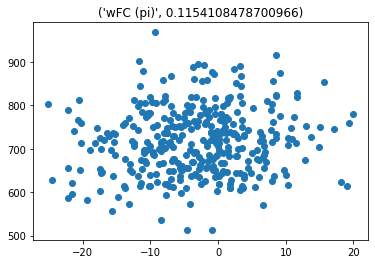

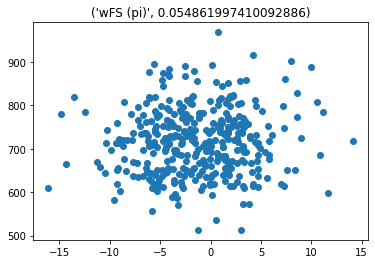

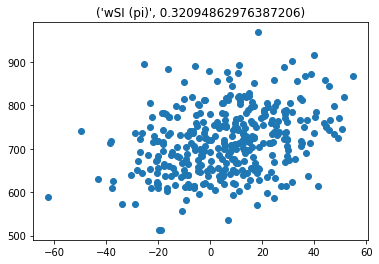

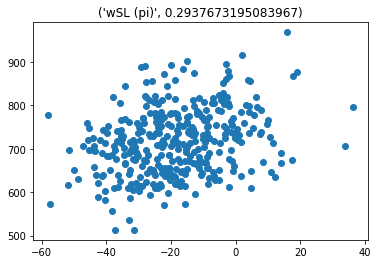

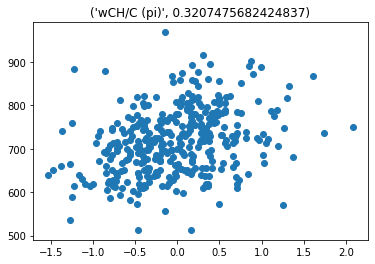

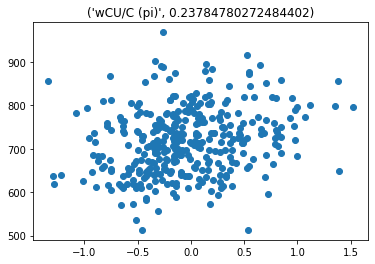

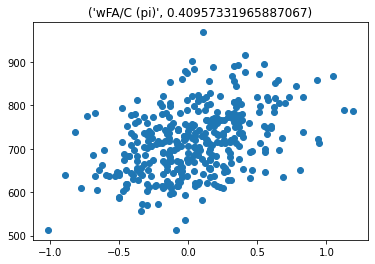

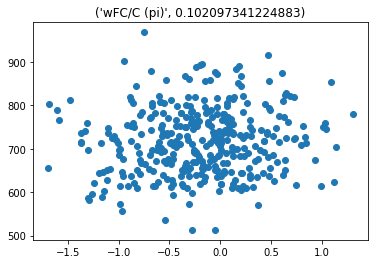

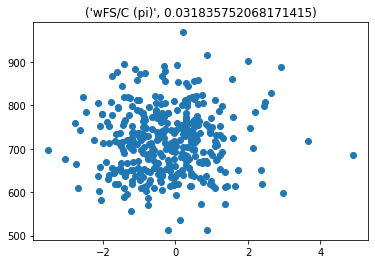

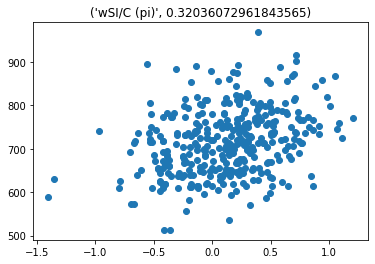

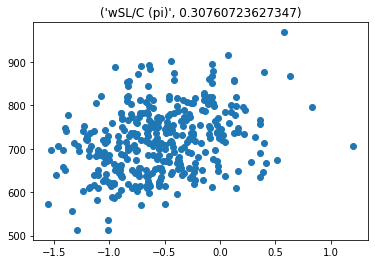

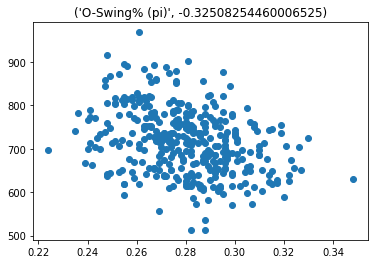

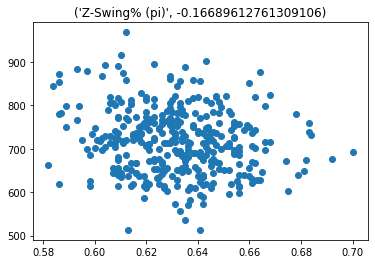

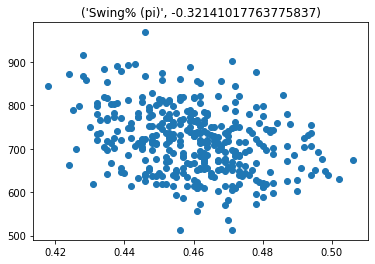

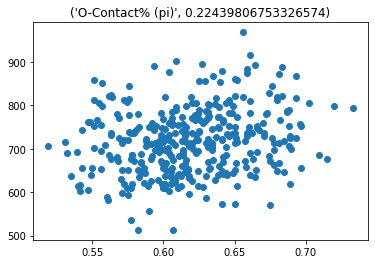

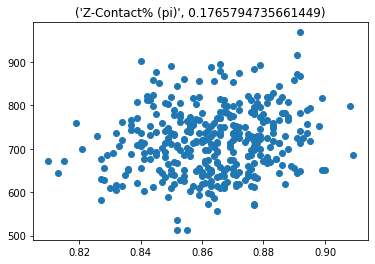

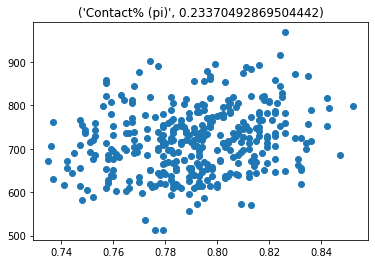

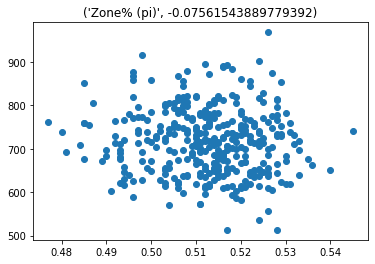

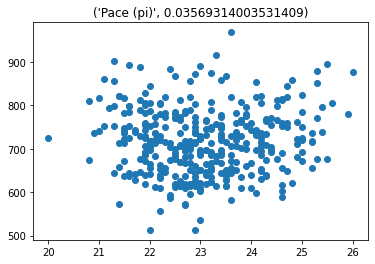

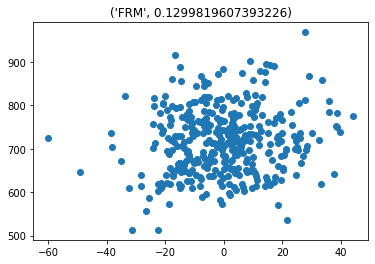

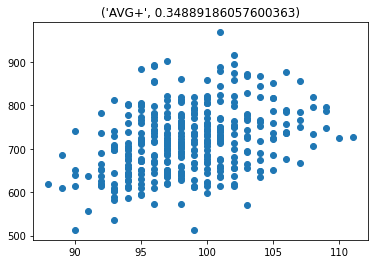

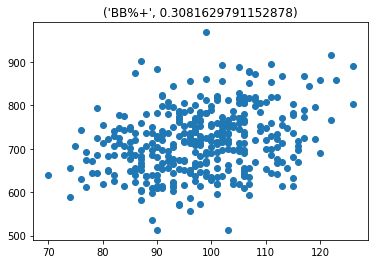

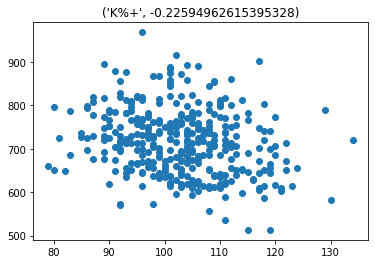

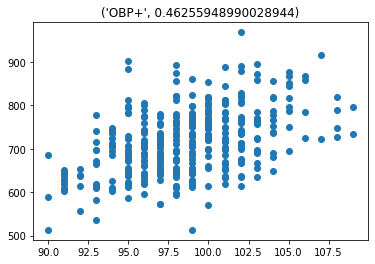

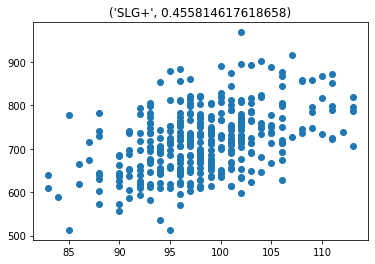

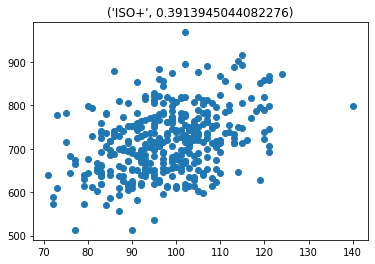

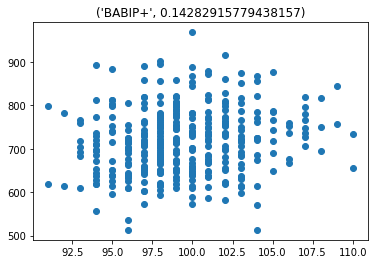

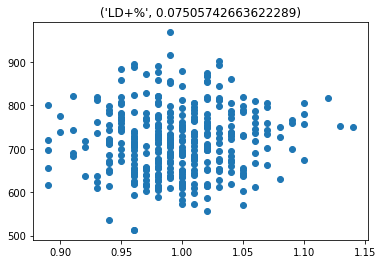

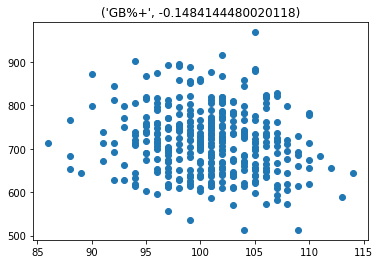

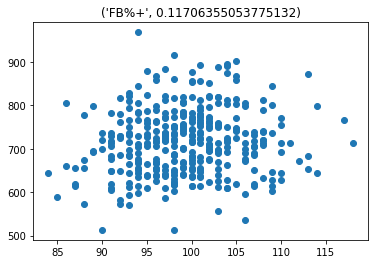

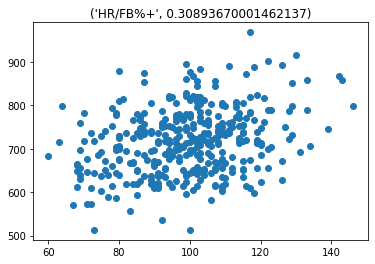

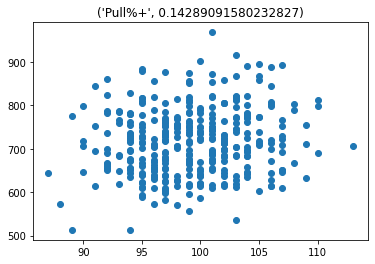

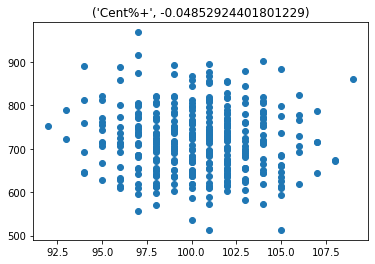

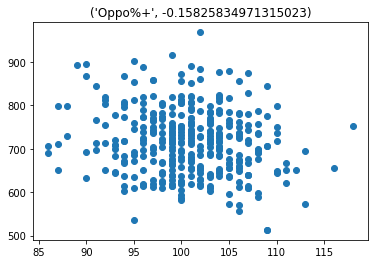

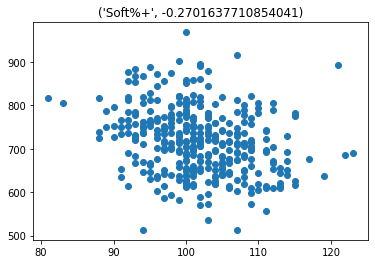

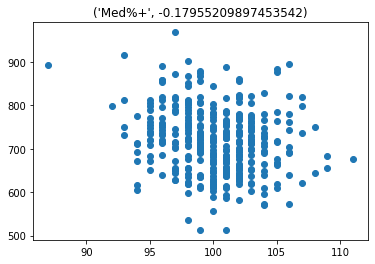

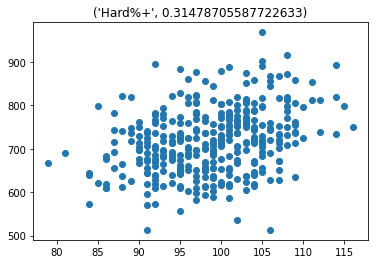

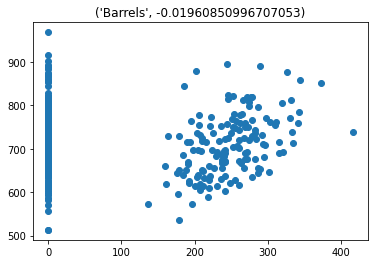

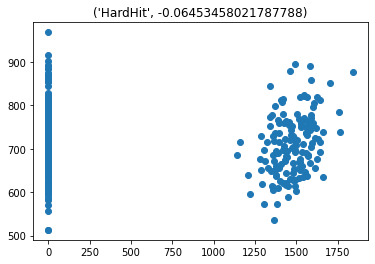

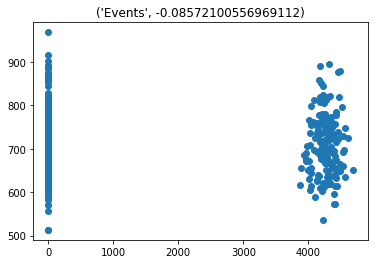

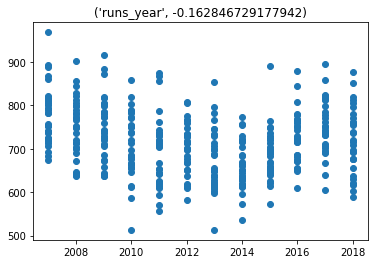

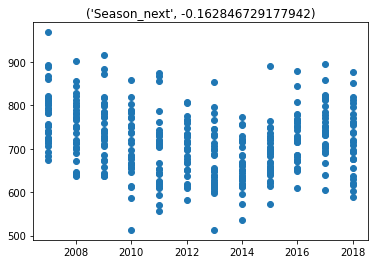

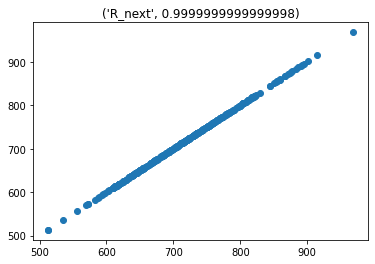

        0               1         2          3         4         5    \
0  teamIDfg  Season_current       Age          G        AB        PA   
1 -0.257715       -0.162847  0.246979 -0.0305523  0.255679  0.472139   

        6          7        8          9    ...       244       245       246  \
0         H         1B       2B         3B  ...    Oppo%+    Soft%+     Med%+   
1  0.385341  0.0972305  0.34206 -0.0554332  ... -0.158258 -0.270164 -0.179552   

        247        248        249       250        251          252     253  
0    Hard%+    Barrels    HardHit    Events  runs_year  Season_next  R_next  
1  0.314787 -0.0196085 -0.0645346 -0.085721  -0.162847    -0.162847       1  

[2 rows x 254 columns]


In [4]:
corrs = []
names = []
for col in hitting:
    try:
        #calculate correlation coefficient of variable
        title = (col,stats.pearsonr(hitting[col], hitting['R_next'])[0])
        
        #writing to lists
        corrs.append(stats.pearsonr(hitting[col], hitting['R_next'])[0])
        names.append(col)
        
        #scatter plot
        plt.figure()
        plt.scatter(x=hitting[col]
                    , y=hitting['R_next'])
        plt.title(title)
        plt.show()
    except:
        continue
        
print(pd.DataFrame([names,corrs]))

In [5]:
corr_df = pd.DataFrame([names,corrs]).T.sort_values(1, ascending=True)
corr_df.columns = ['var','r']

corr_df.head(40)

var         r
102       F-Strike% -0.420763
95         O-Swing% -0.390245
222   O-Swing% (pi) -0.325083
224     Swing% (pi)  -0.32141
41            GB/FB -0.321341
161    Swing% (pfx) -0.320536
97           Swing% -0.317233
159  O-Swing% (pfx)  -0.30838
43              GB% -0.279598
34               K% -0.276002
103          SwStr% -0.270373
245          Soft%+ -0.270164
0          teamIDfg -0.257715
65              pLI -0.248626
193        vSL (pi) -0.244643
125      FC-X (pfx) -0.242654
189        vFA (pi) -0.232211
174           Cent%  -0.22772
233             K%+  -0.22595
15               SO -0.219111
204       FC-Z (pi) -0.217484
67               PH -0.204018
55              Pos -0.199549
176           Soft% -0.198647
128      SL-X (pfx) -0.198503
197       FC-X (pi) -0.191129
129      CU-X (pfx)  -0.18436
246           Med%+ -0.179552
126      FS-X (pfx) -0.175588
160  Z-Swing% (pfx) -0.174416
119       vSL (pfx) -0.171446
195       CU-X (pi) -0.170488
223   Z-Swing% (pi) -0.166896
106       FT% (pfx) -0.166621
31               BU -0.165937
252     Season_next -0.162847
1    Season_current -0.162847
251       runs_year -0.162847
190        vFC (pi) -0.160113
187        vCH (pi) -0.158969

In [6]:
hitting_corr_vars_only = hitting.copy()

incl = [
        'R_next',
        'wOBA',
        'wRC',
        'OBP',
        'OPS',
        'SLG',
        'BB/K',
        'wRAA',
        'SLG',
        'wFB',
        'wFB/C',
        'BB%',
        'wFA (pi)', 
        'wFA/C (pi)',
        'Rep',
        'wFA (pfx)',
        'wFA/C (pfx)',
        'ISO+',
        'RE24',
        'REW',
        'wRC+',
        'RAR',
        'Off',
        'AVG+',
        'WPA/LI',
        'WAR',
'F-Strike%',
'O-Swing%',
'O-Swing% (pi)',
'Swing% (pi)',
'GB/FB',
'Swing% (pfx)',
'Swing%',
'O-Swing% (pfx)',
        ]

for col in hitting_corr_vars_only:
    if col not in incl:
        del hitting_corr_vars_only[col]

hitting_corr_vars_only.head()

BB%  BB/K    OBP    SLG    OPS  GB/FB   wOBA   wRAA  wRC    Rep  ...  \
0  0.092  0.49  0.354  0.462  0.816   1.15  0.355  139.6  919  197.3  ...   
1  0.101  0.60  0.358  0.447  0.805   1.07  0.351  122.4  893  194.9  ...   
2  0.100  0.54  0.354  0.443  0.797   1.19  0.349   99.9  868  194.4  ...   
3  0.090  0.53  0.340  0.444  0.784   1.13  0.343   74.7  837  192.8  ...   
4  0.091  0.59  0.350  0.433  0.783   1.29  0.342   68.7  835  194.0  ...   

   O-Swing% (pfx)  Swing% (pfx)    Off  wFA (pi)  wFA/C (pi)  O-Swing% (pi)  \
0           0.262         0.459  108.0      57.0        0.63          0.263   
1           0.246         0.428   72.1      28.4        0.32          0.249   
2           0.273         0.448   33.1      55.4        0.60          0.276   
3           0.270         0.460   42.2      16.5        0.18          0.272   
4           0.275         0.466   46.3      29.7        0.33          0.280   

   Swing% (pi)  AVG+  ISO+  R_next  
0        0.460   105   117     816  
1        0.428   104   110     867  
2        0.448   104   104     752  
3        0.459   101   113     887  
4        0.466   105    96     725  

[5 rows x 33 columns]

<AxesSubplot:>

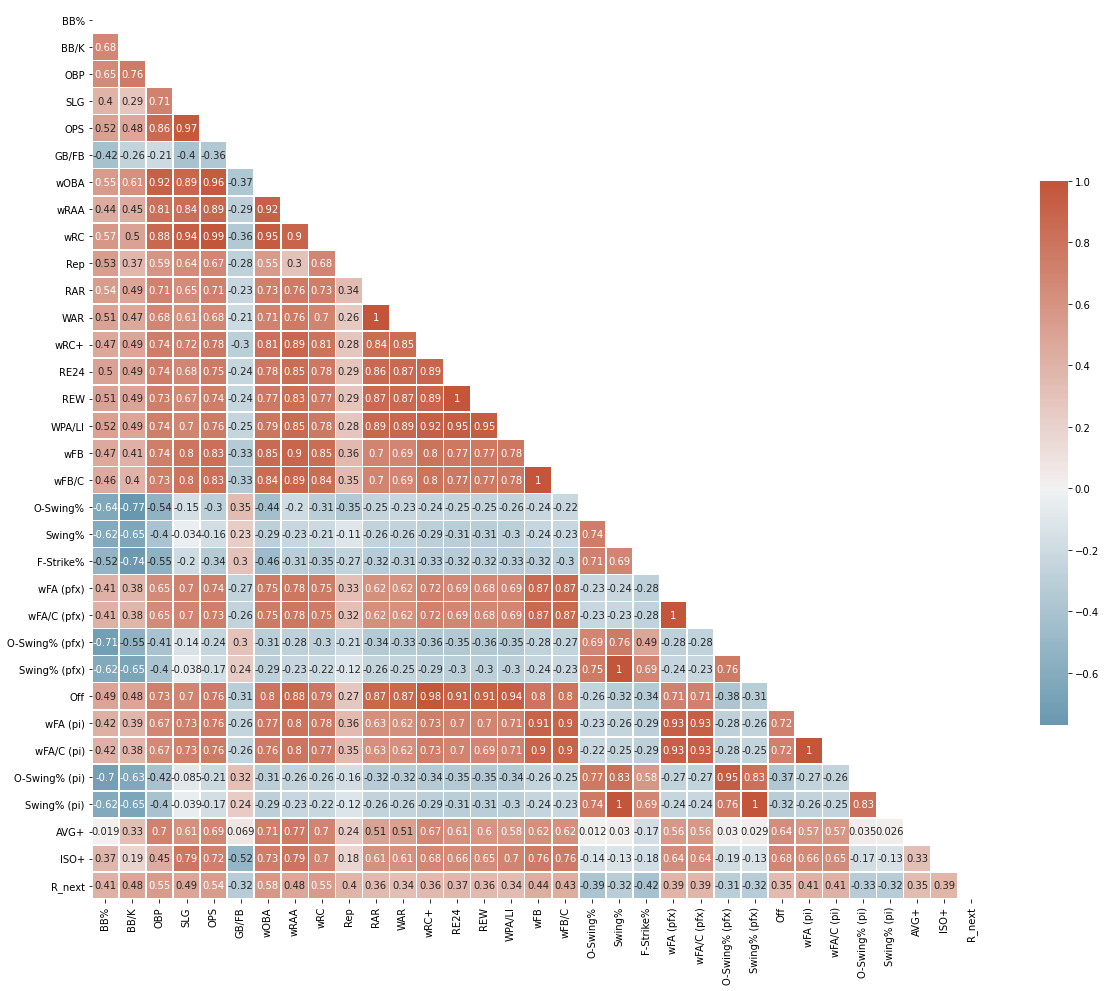

In [7]:
corr = hitting_corr_vars_only.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

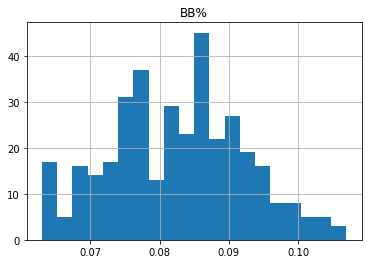

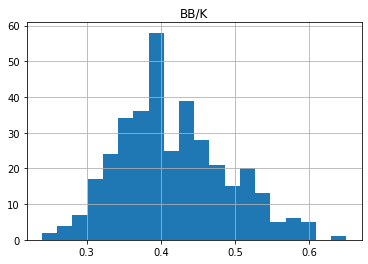

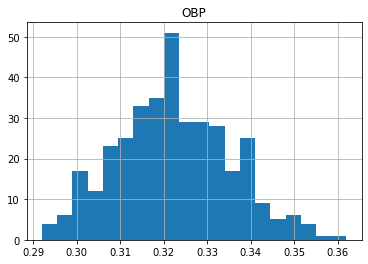

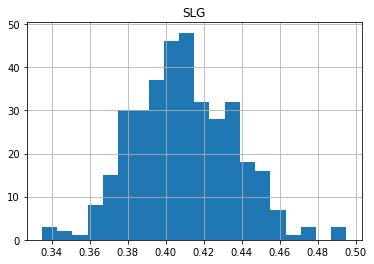

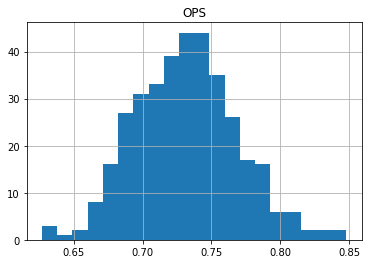

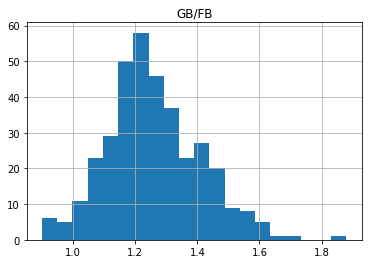

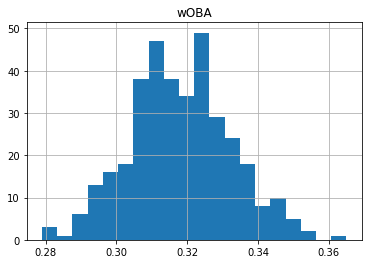

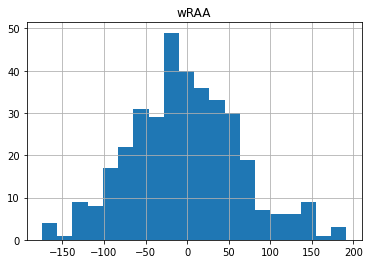

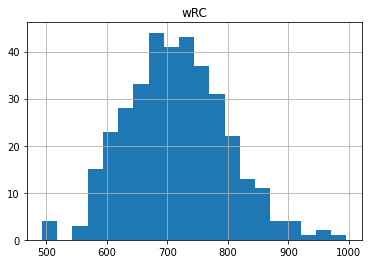

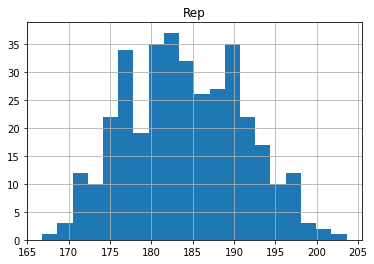

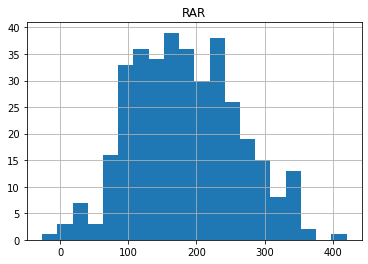

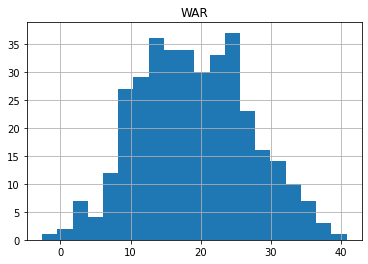

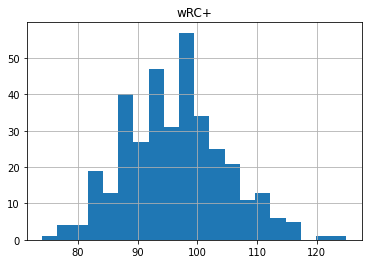

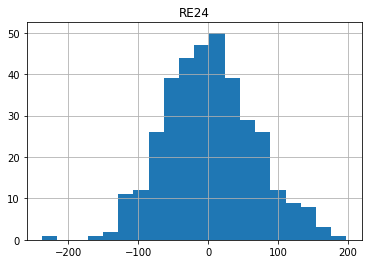

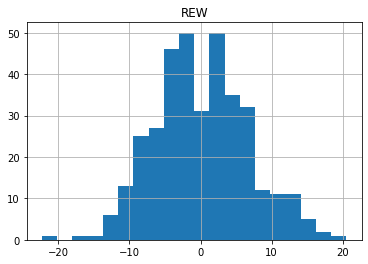

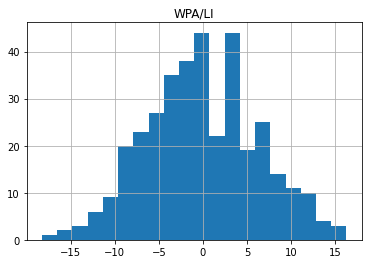

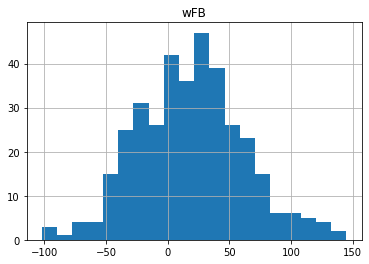

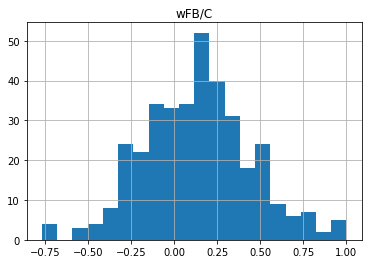

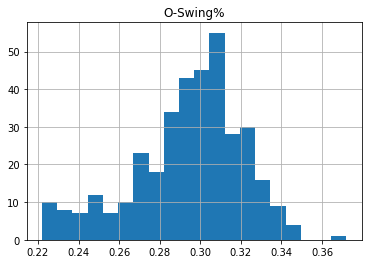

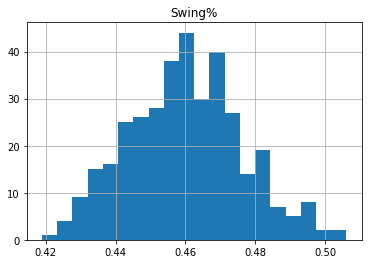

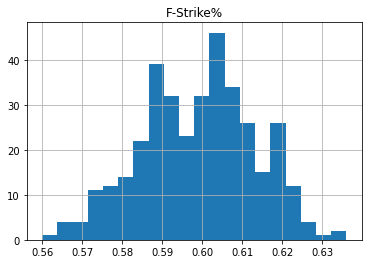

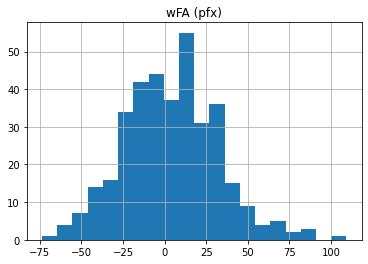

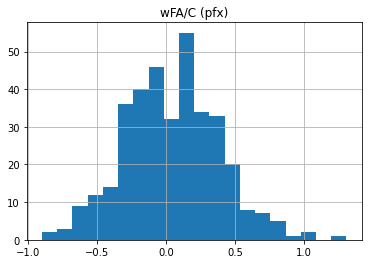

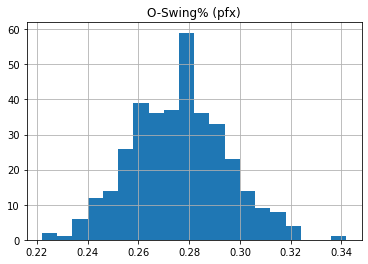

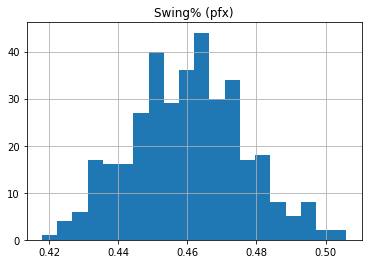

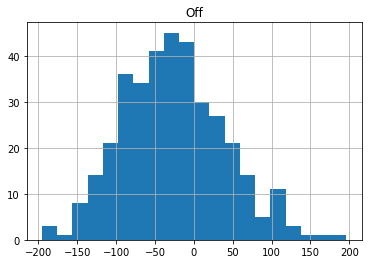

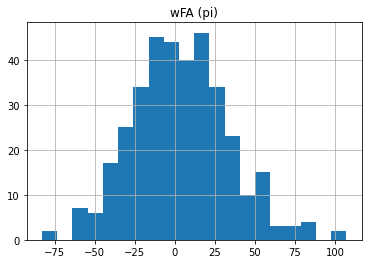

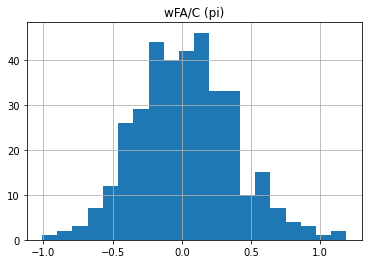

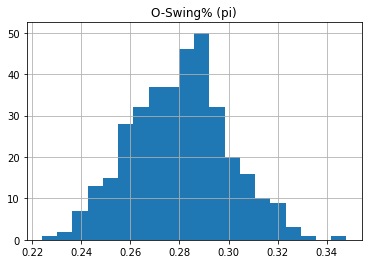

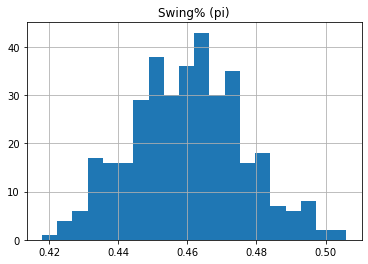

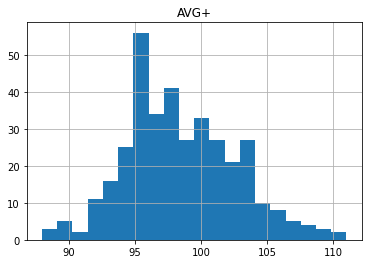

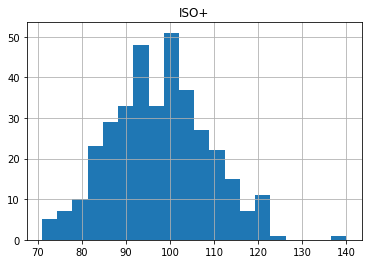

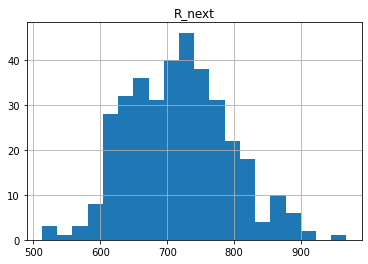

In [8]:
for col in hitting_corr_vars_only:
    try:
        #scatter plot
        plt.figure()
        hitting_corr_vars_only[col].hist(bins=20)
        plt.title(col)
        plt.show()
    except:
        continue

In [9]:
hitting['GBFB_RATIO'] = hitting['GB/FB']
hitting['BB_PERC'] = hitting['BB%']
hitting['K_PERC'] = hitting['K%']
hitting['BB_K_RATIO'] = hitting['BB/K']

hitting['F_STRIKE_PERC'] = hitting['F-Strike%']
hitting['O_SWING_PERC'] = hitting['O-Swing%']
hitting['O_SWING_PERC_PI'] = hitting['O-Swing% (pi)']
hitting['SWING_PERC'] = hitting['Swing% (pi)']

                            OLS Regression Results                            
Dep. Variable:                 R_next   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     70.02
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           1.29e-35
Time:                        20:16:48   Log-Likelihood:                -1984.2
No. Observations:                 360   AIC:                             3976.
Df Residuals:                     356   BIC:                             3992.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8176     95.916      0.092      0.9

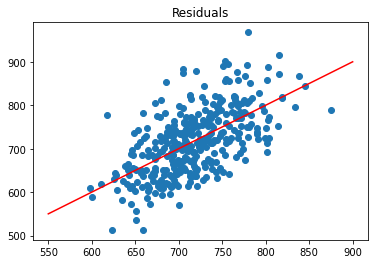

In [10]:
mod = smf.ols(
    """
        R_next ~ wOBA 
                + GBFB_RATIO 
                + BB_K_RATIO

    """,
    data=hitting,
).fit()

print(mod.summary())

hitting['pred'] = mod.predict(hitting)

print('MPE=',np.mean((hitting['pred'] - hitting['R_next']) / hitting['R_next']))
print('MAPE=',np.mean(abs(hitting['pred'] - hitting['R_next']) / hitting['R_next']))

plt.figure()
plt.scatter(x=hitting['pred']
            , y=hitting['R_next'])
plt.plot([550,900],[550,900], color='red')
plt.title('Residuals')
plt.show()

2009
MPE= 0.03947208387262805
MAPE= 0.07128114588337202
2010
MPE= 0.021655366880475268
MAPE= 0.06710759305769179
2011
MPE= 0.026348948158555825
MAPE= 0.06878452718031025


/opt/miniconda3/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/miniconda3/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/miniconda3/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/miniconda3/envs/env/lib/python3.6/site-packages/ipykernel_launche

2012
MPE= 0.029013468200225323
MAPE= 0.0712387309350899
2013
MPE= 0.023939611933717117
MAPE= 0.07016126608667675
2014
MPE= 0.024791147419806144
MAPE= 0.07270494147479273
2015
MPE= 0.028765550740946076
MAPE= 0.07457252620017059
2016
MPE= 0.028036437714497587
MAPE= 0.07307640046528005
2017
MPE= 0.023238710165573273
MAPE= 0.07253364588571737
2018
MPE= 0.013715665941705868
MAPE= 0.07313106576765921
2019
MPE= 0.011813873809997932
MAPE= 0.07069367107651091


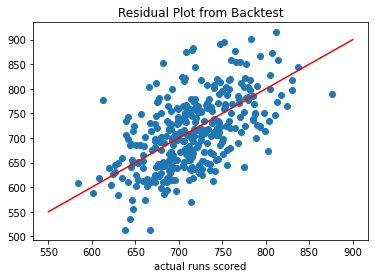

In [11]:
#pulling 10 years of team data
year = 2009

hitting_test = hitting.copy()
while year < 2020:
    #defining model for testing
    mod = smf.ols(
    """
        R_next ~ wOBA
                + GBFB_RATIO 
                + BB_K_RATIO

    """,
    data=hitting[hitting['Season_current']<year]).fit()
    
    #applying model to all data
    pred = mod.predict(hitting_test)
    
    #only writing results to DF if its in current year
    try:
        hitting_test['backtest_pred'][hitting_test['Season_current'] == year] = pred
    except:
        hitting_test['backtest_pred'] = np.nan
        hitting_test['backtest_pred'][hitting_test['Season_current'] == year] = pred
    
    #writing output
    print(year)
    print('MPE=',np.mean((hitting_test['backtest_pred'] - hitting_test['R_next']) / hitting_test['R_next']))
    print('MAPE=',np.mean(abs(hitting_test['backtest_pred'] - hitting_test['R_next']) / hitting_test['R_next']))
    
    year = year+1
    
    
#backtested residual plot
plt.figure()
plt.scatter(x=hitting_test['backtest_pred']
            , y=hitting_test['R_next'])
plt.plot([550,900],[550,900], color='red')
plt.title('Residual Plot from Backtest')
plt.xlabel('predicted runs scored')
plt.xlabel('actual runs scored')
plt.show()